<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
     <td align="left"; style="background-color:transparent; width: 33%;"><a href="http://www.math-evry.cnrs.fr/departement/doku.php?id=formation:master:m2ds"><img src="https://github.com/ramp-kits/scMARK_classification/raw/main/evry_logo.png" width="65%"></a></td>
    <td align="center"; style="background-color:transparent; width: 33%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/bovine_embryo_survival_prediction/raw/main/DATAIA-h.png" width="80%"></a></td>
    <td align="right"; style="background-color:transparent; width: 33%;"><a href="https://www.inrae.fr"><img src="https://www.inrae.fr/themes/custom/inrae_socle/logo.svg" width="40%"></a></td>
  </tr>
</table> 
</div>


<center><h1>Single-cell RNA-seq classification</h1></center>

<center><h3>A RAMP data-challenge on the prediction of cellular types based on genes expression level </h3></center>

<center><h2>Data Saiyentist - Data preprocessing </h2></center>

# Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

# Shape of the data
print("Dimension of X_train :", X_train.shape)
print("Dimension of X_test :", X_test.shape)

Dimension of X_train : (1000, 13551)
Dimension of X_test : (500, 13551)


# Data visualization

**Let's look at pairwise plots of PCA components to have a quick insight about the classification difficulty :**

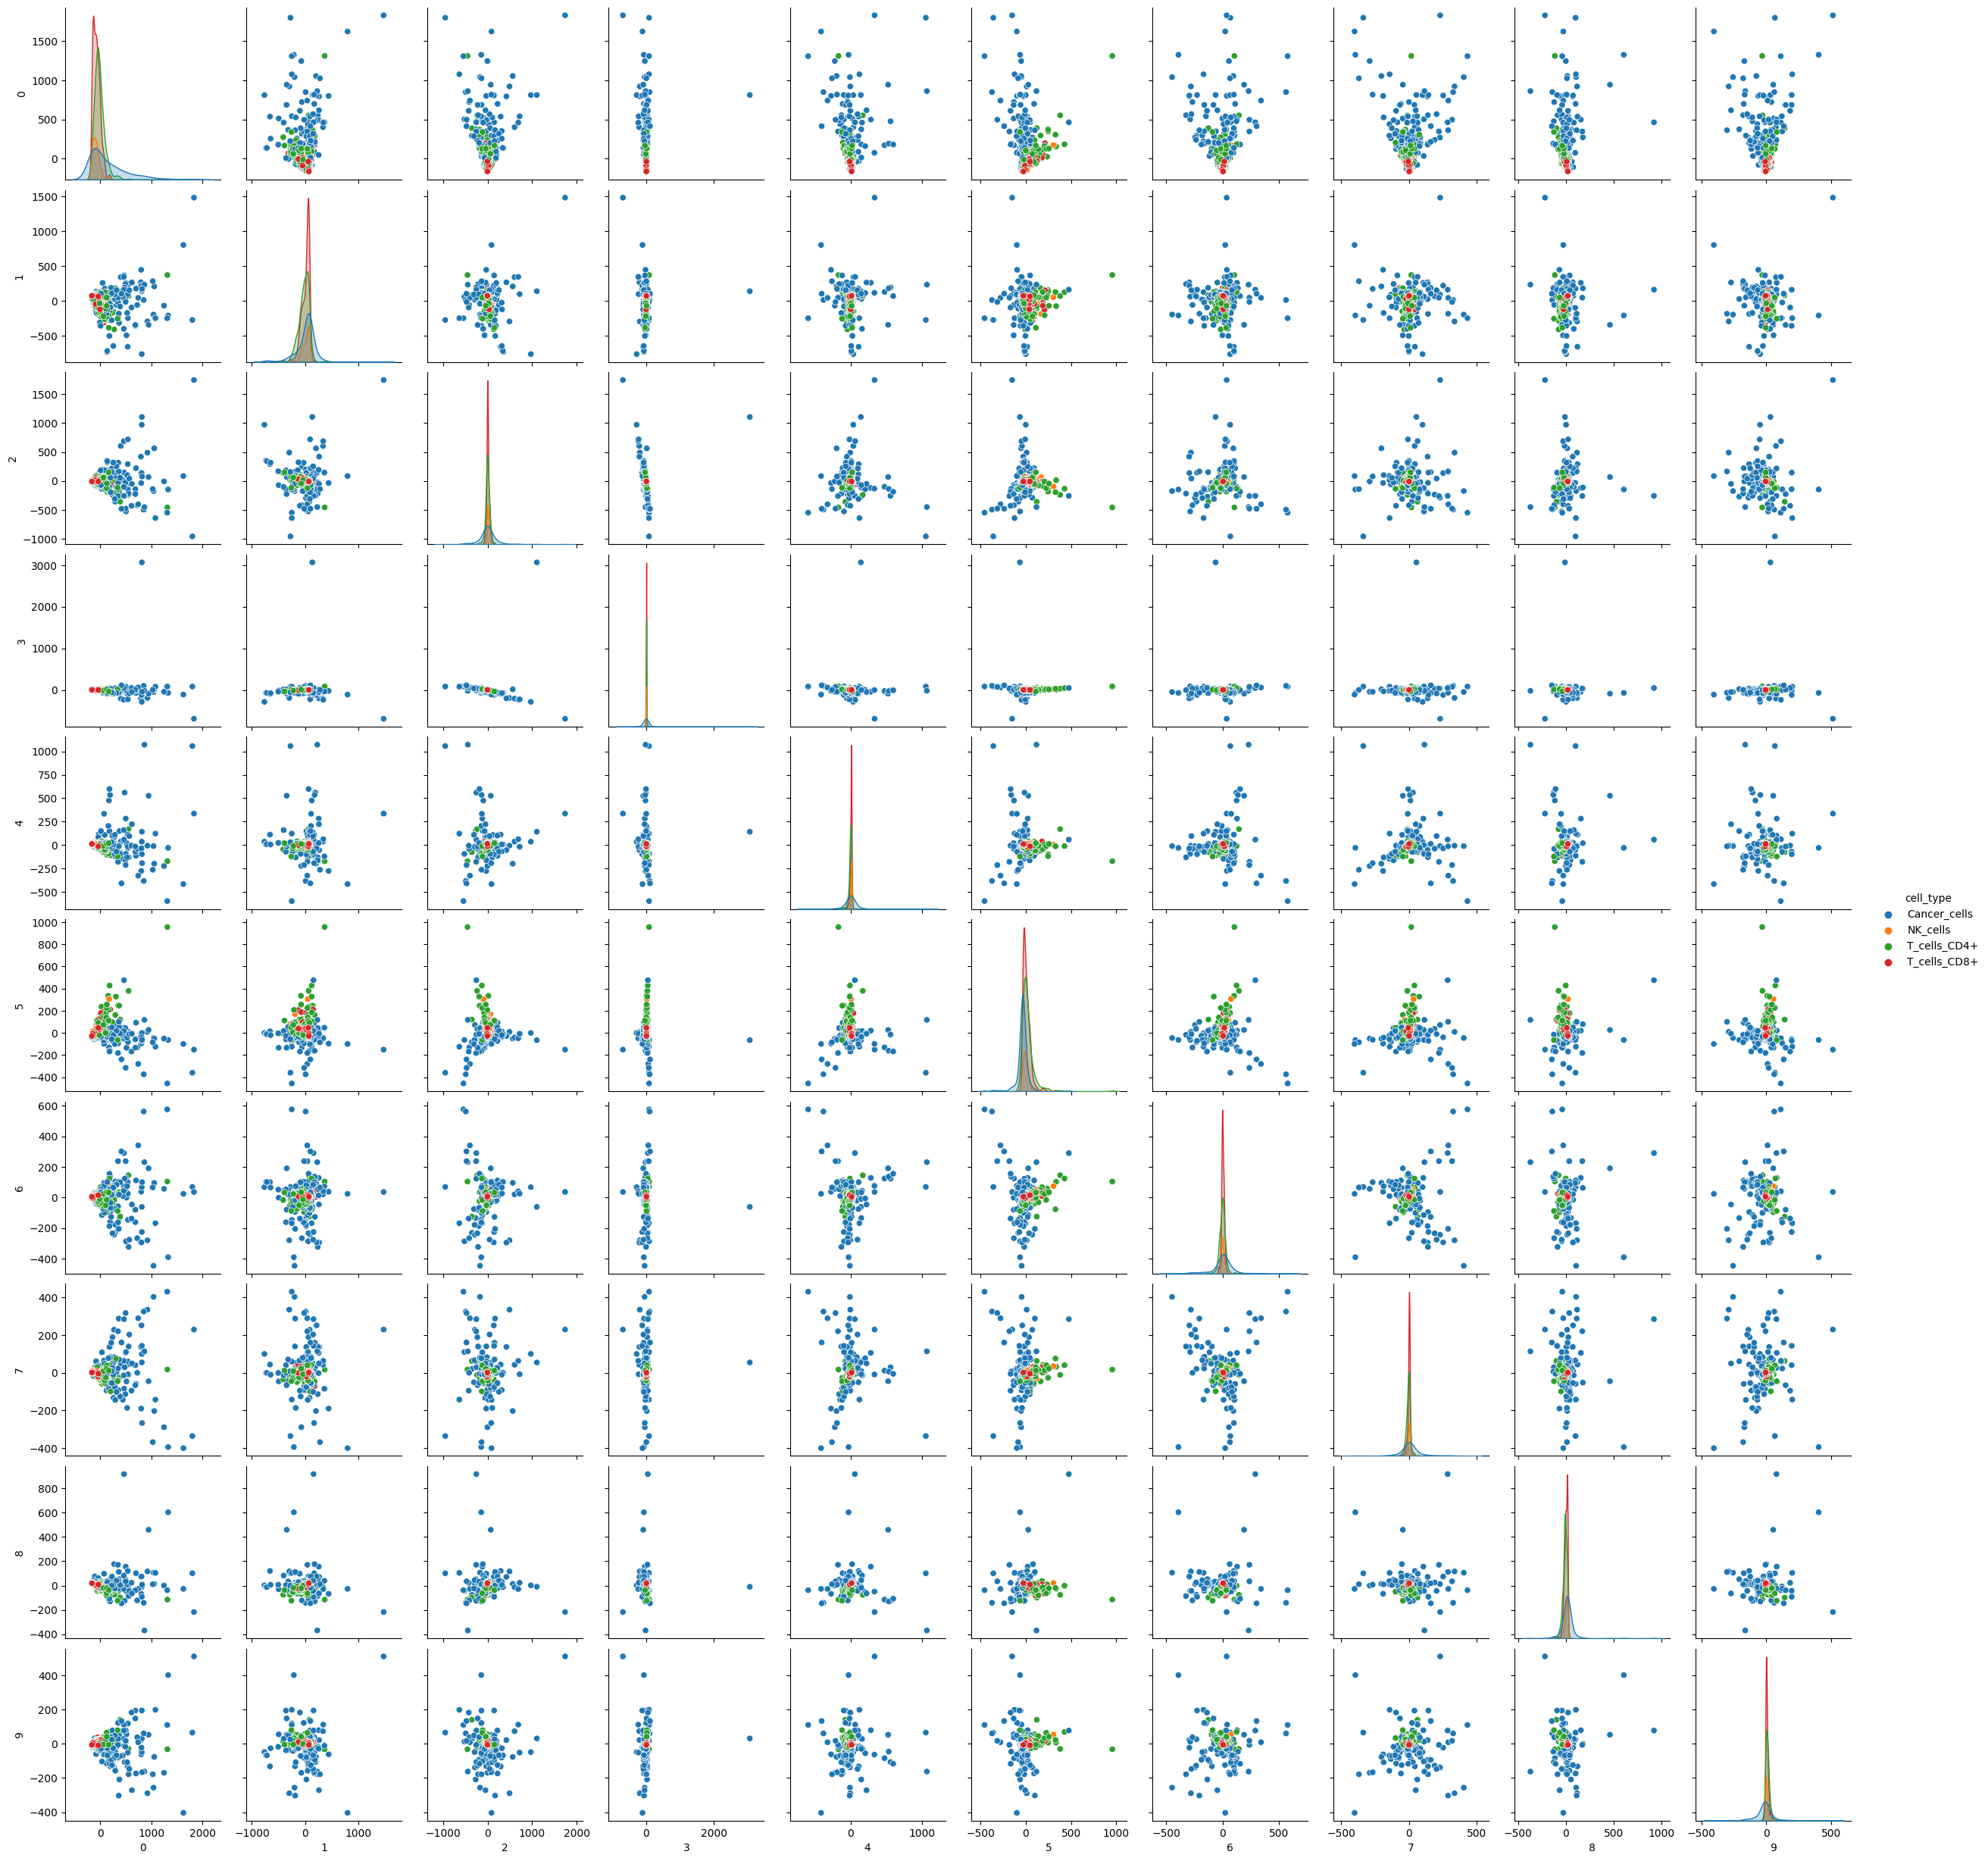

CPU times: total: 14.9 s
Wall time: 15.4 s


In [3]:
%%time
from utils import plot_acp

plot_acp(X_train.toarray(), y_train, 10)

**We notice that the samples are tough to distinguish (cell-types are mixed most of the time). So we are forced to process the dataset to increase its quality (remove some samples, remove some genes, normalize it wisely, aso).**

**But we can even so have a quick look on a t-SNE :**

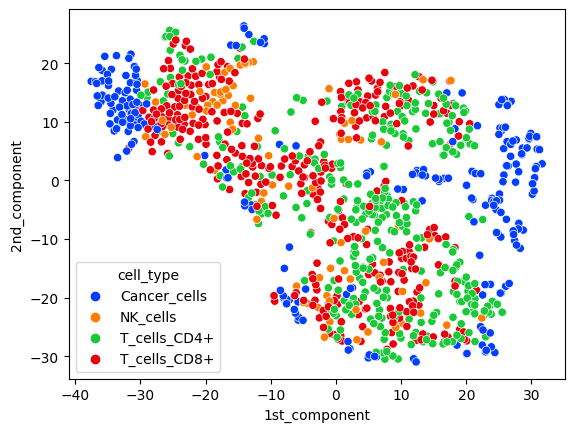

CPU times: total: 32.9 s
Wall time: 2.67 s


In [3]:
%%time
from utils import plot_tsne

plot_tsne(X_train.toarray(), y_train)

## Genes expression for each cell

**This time we will look at each cell to verify whether we should remove it or not.**

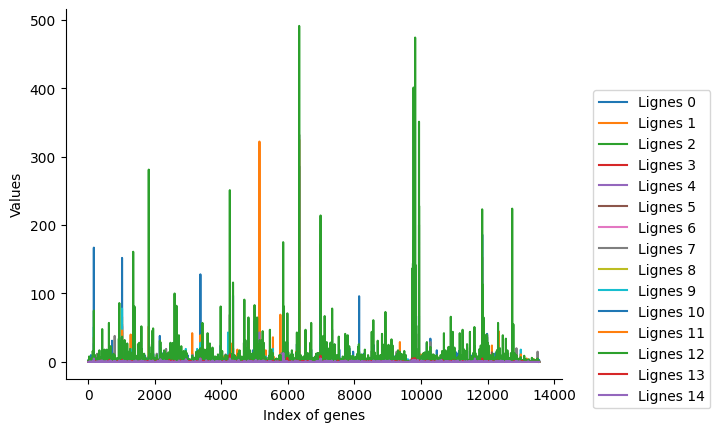

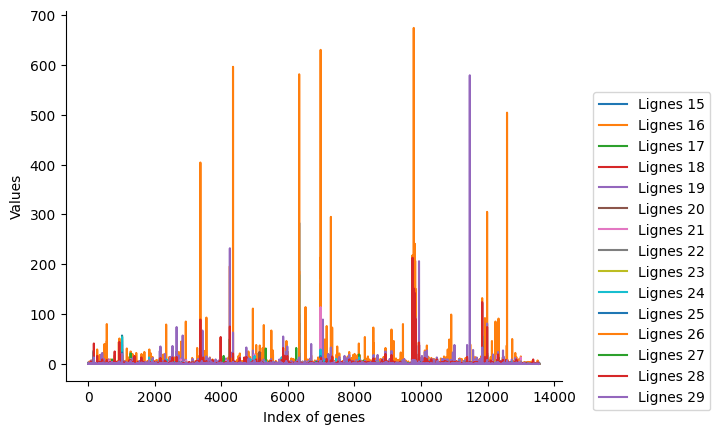

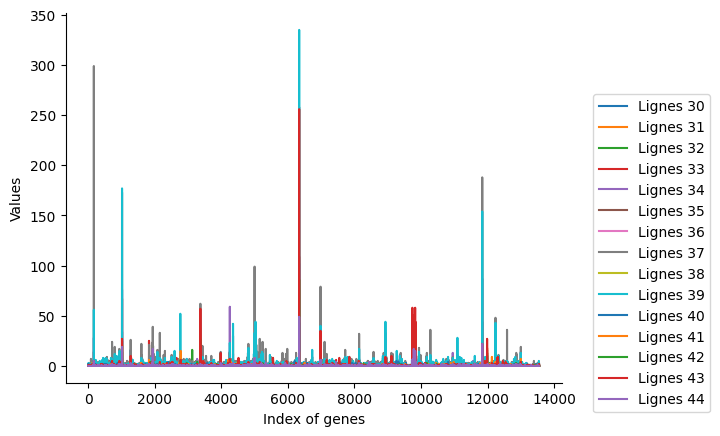

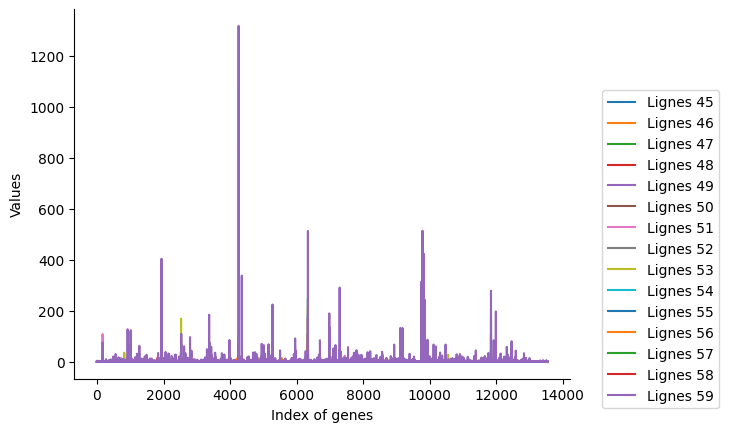

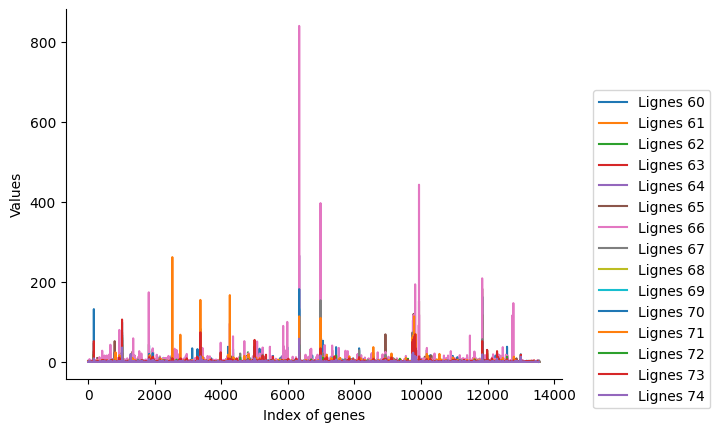

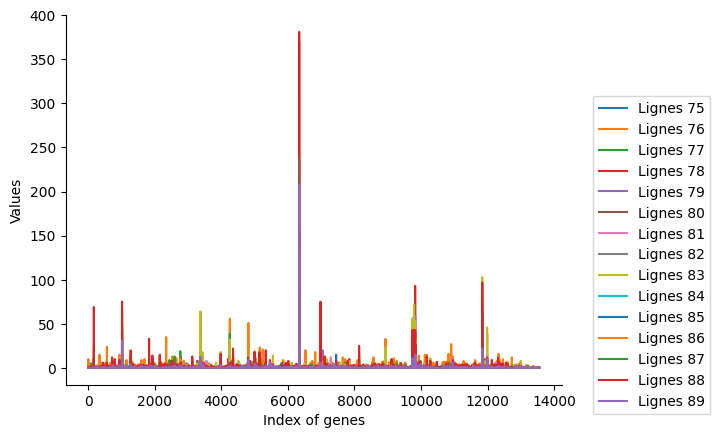

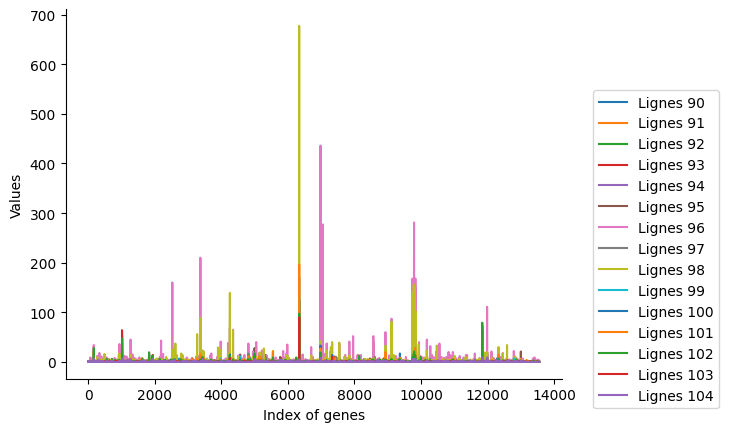

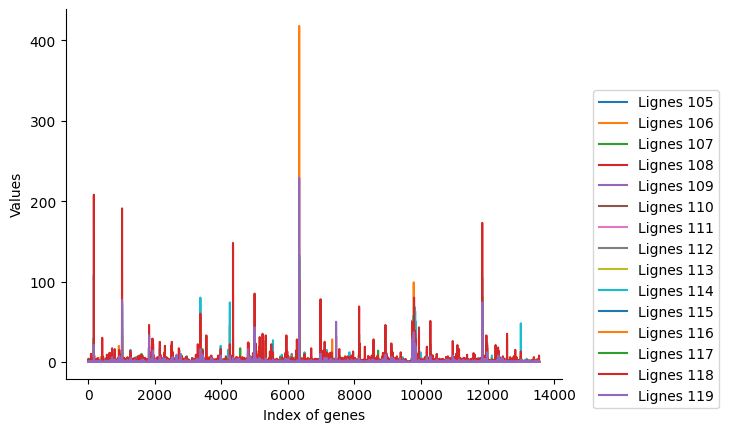

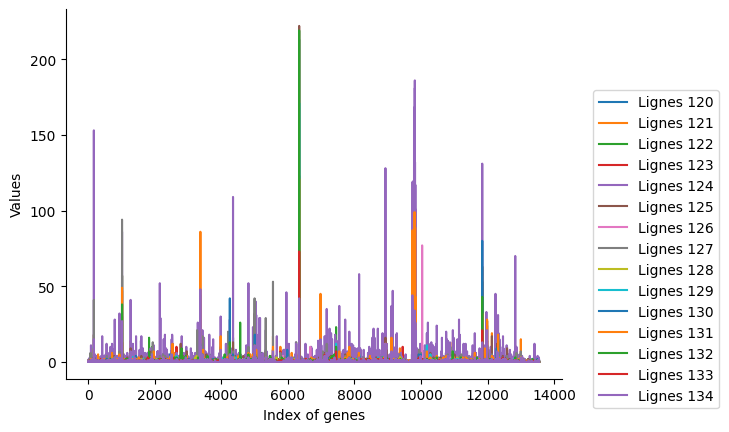

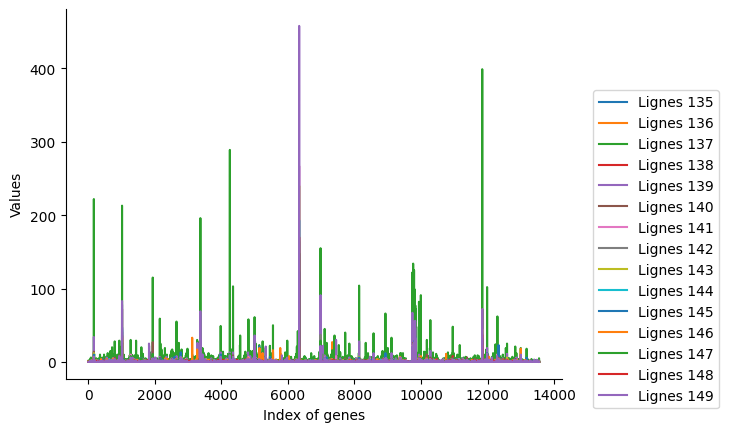

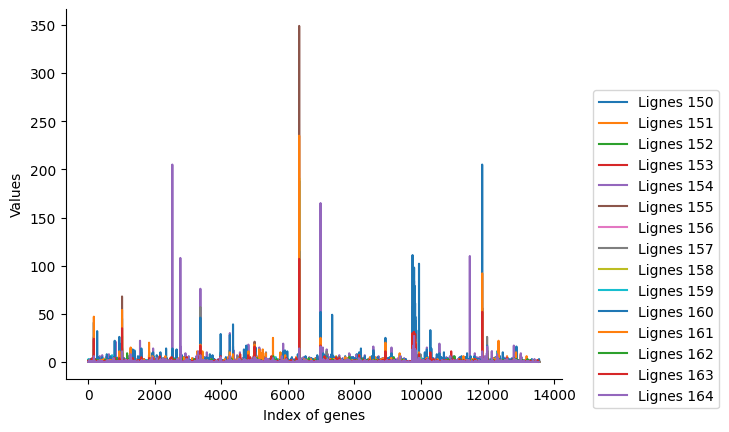

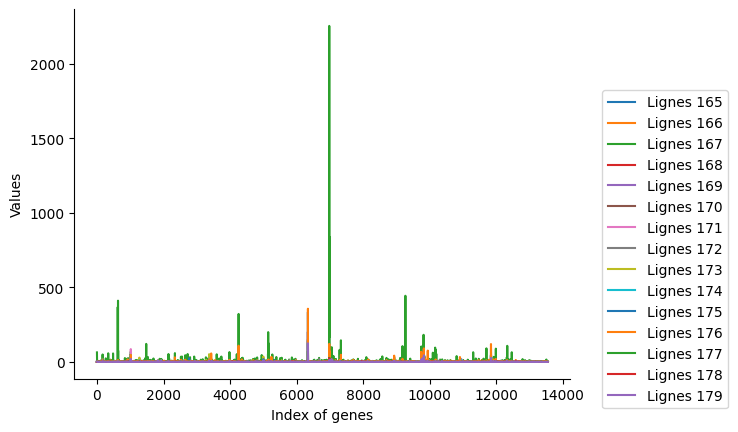

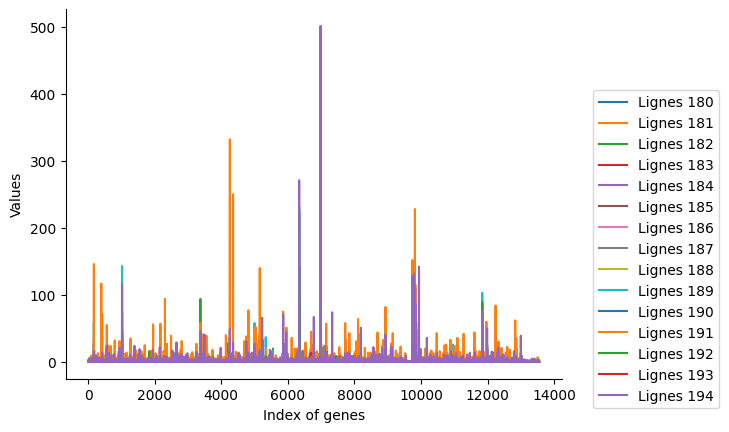

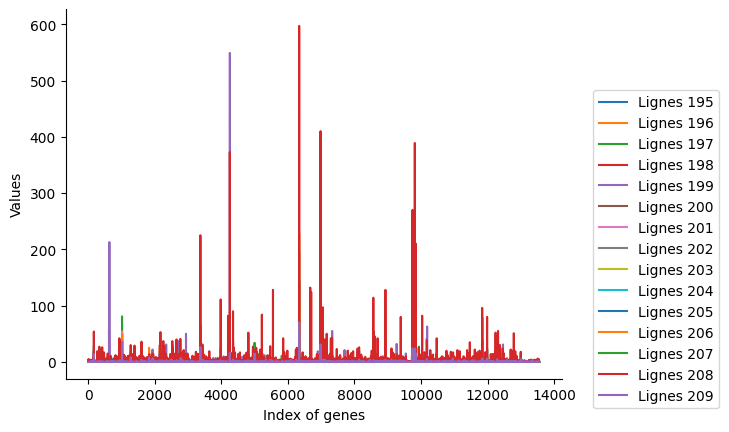

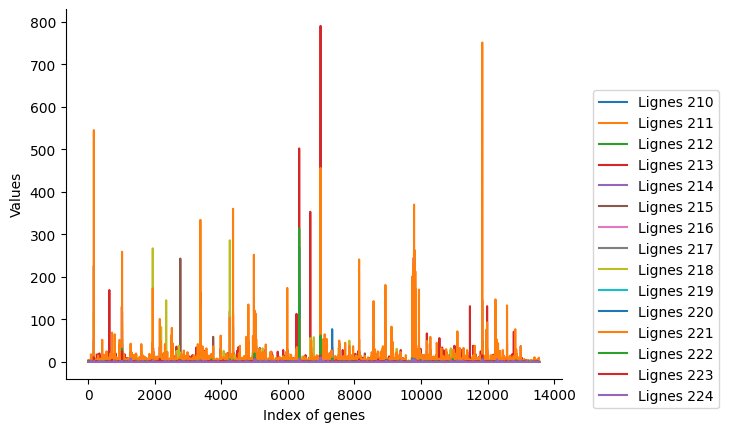

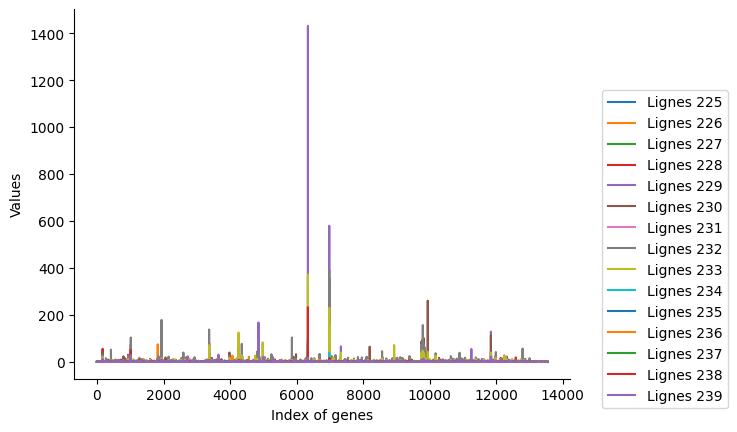

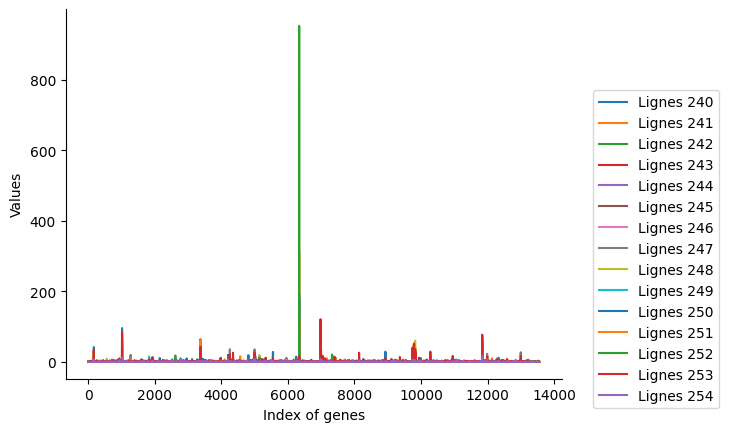

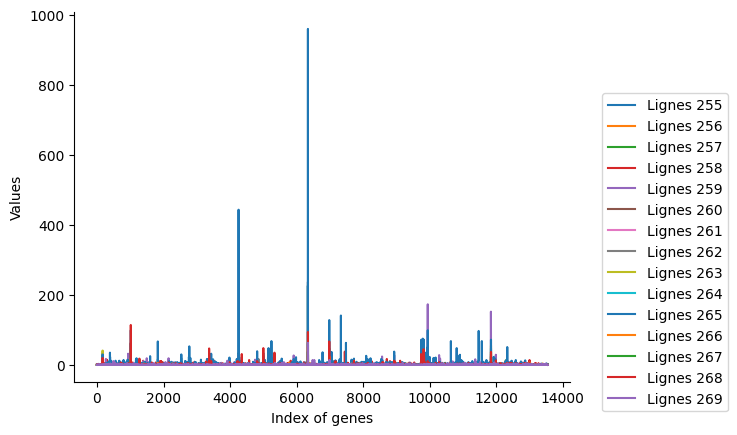

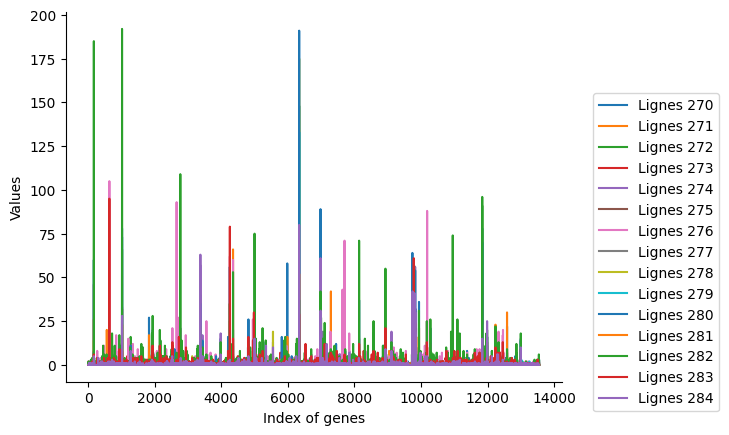

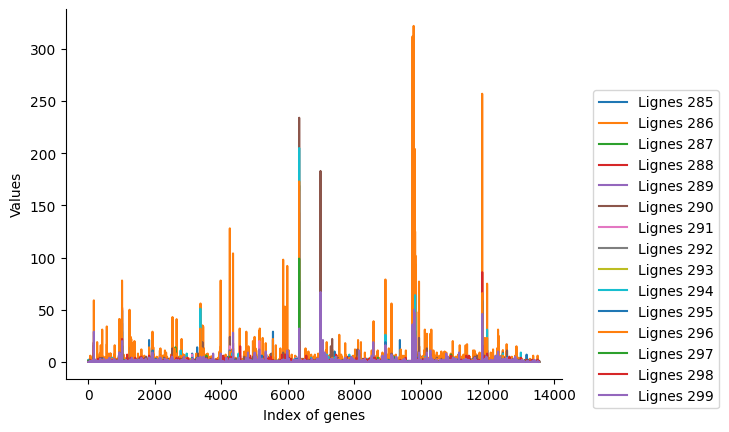

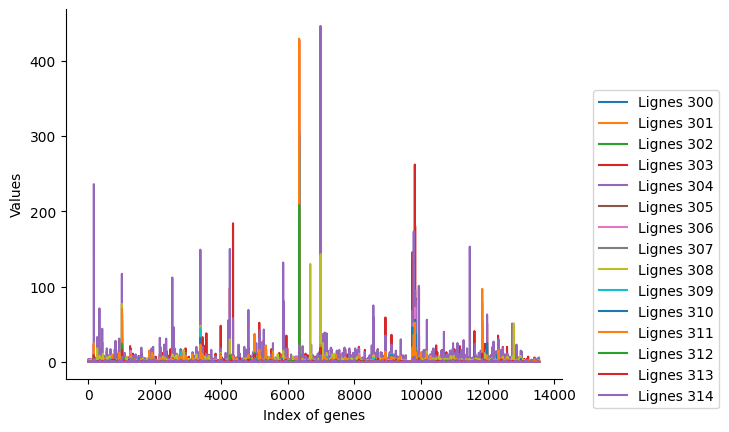

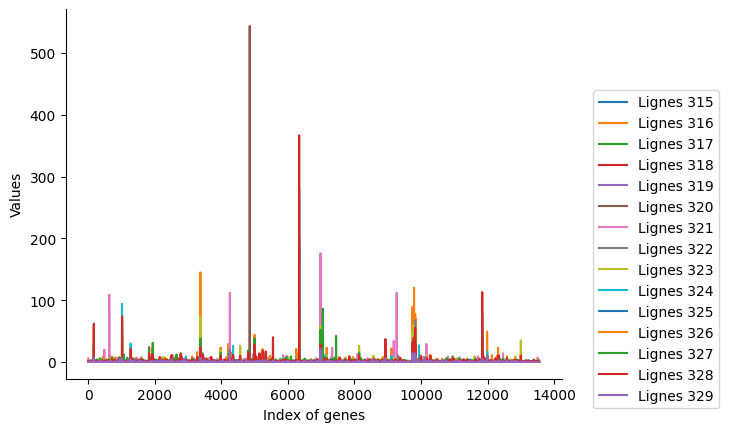

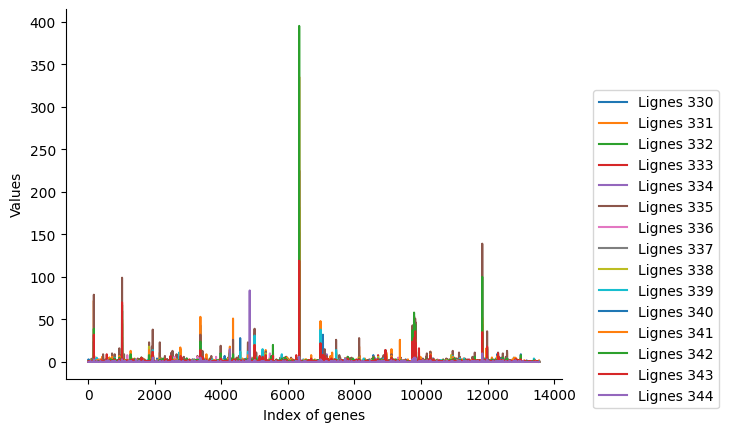

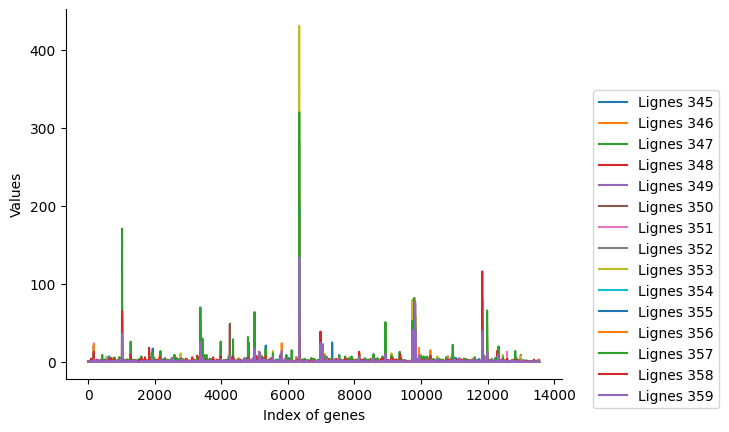

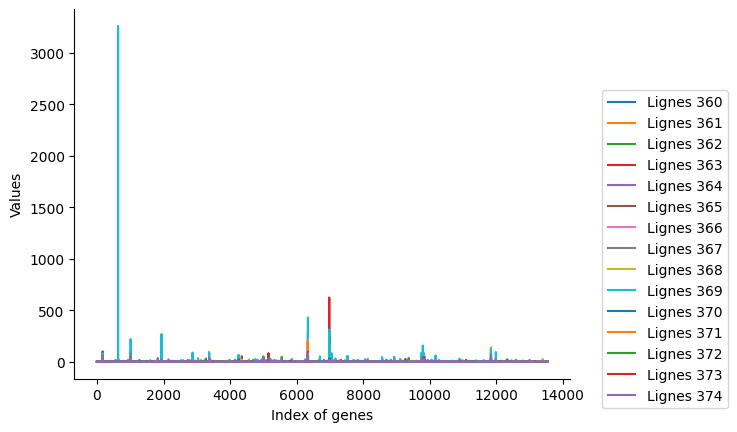

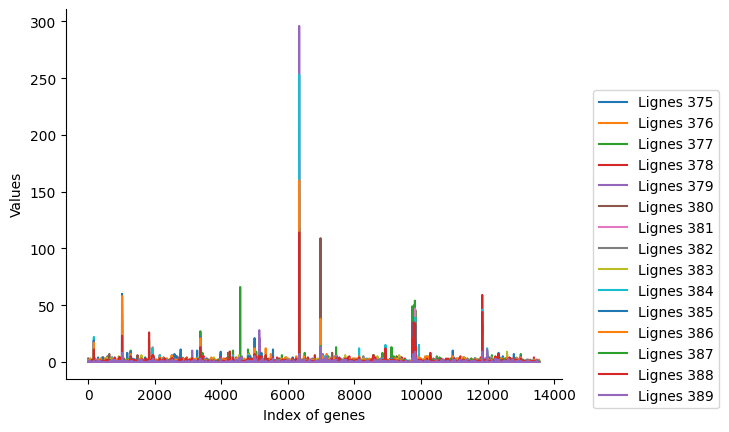

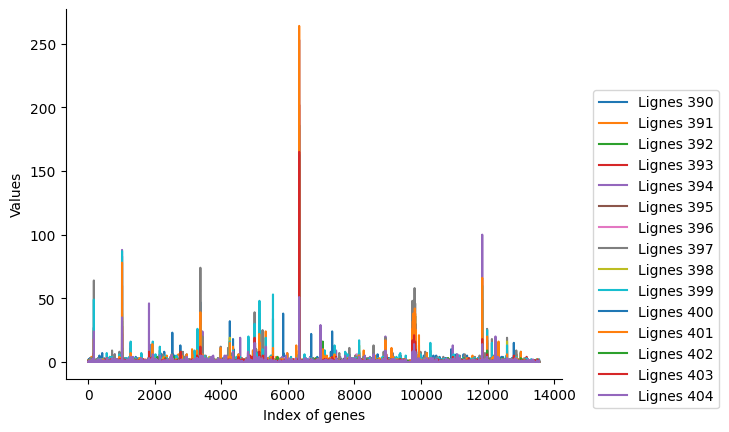

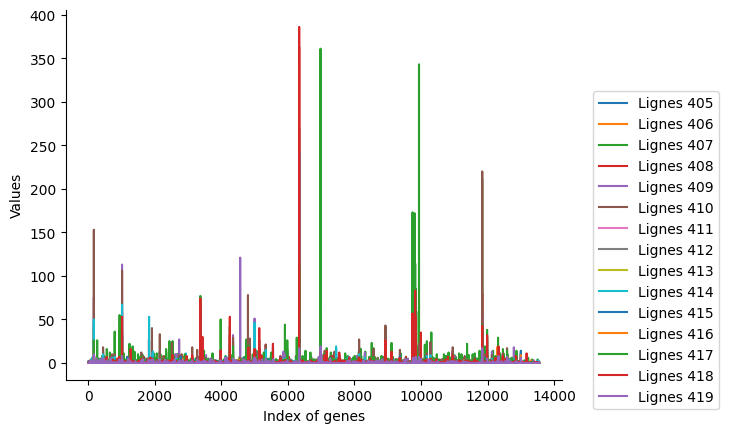

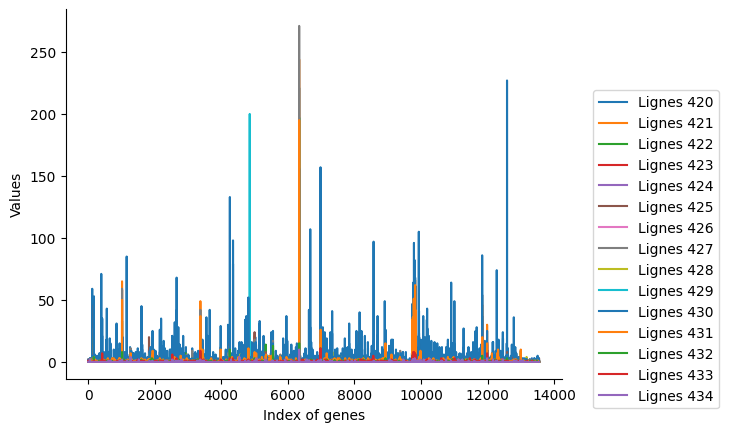

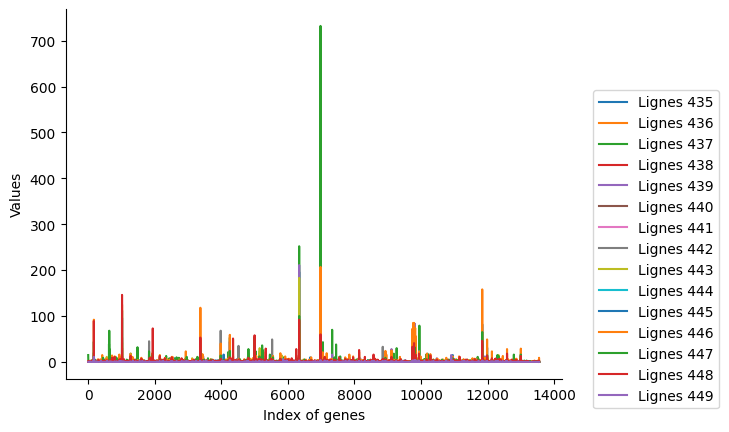

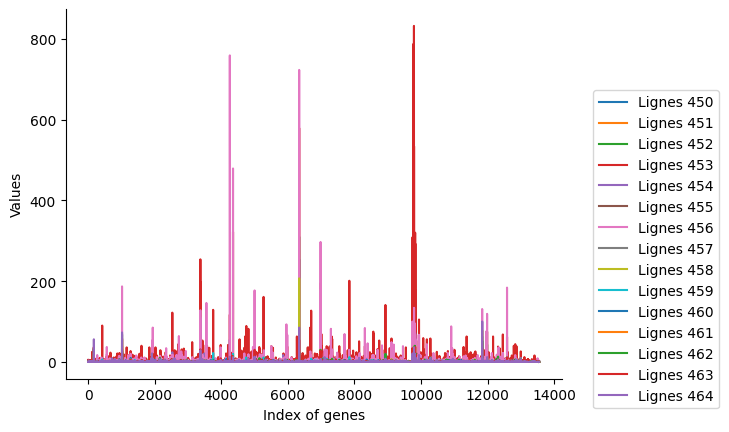

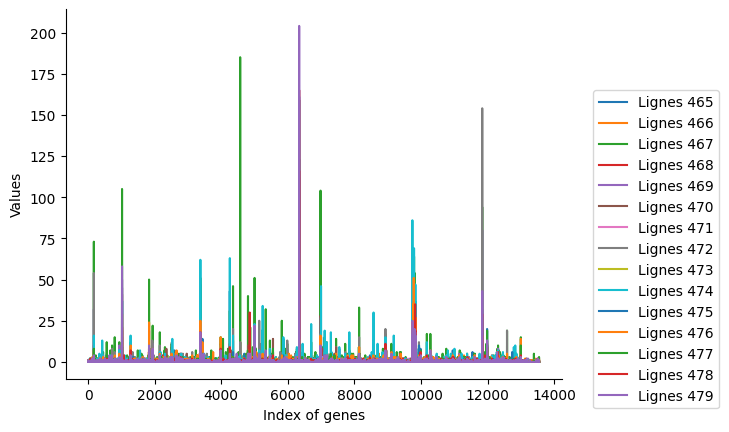

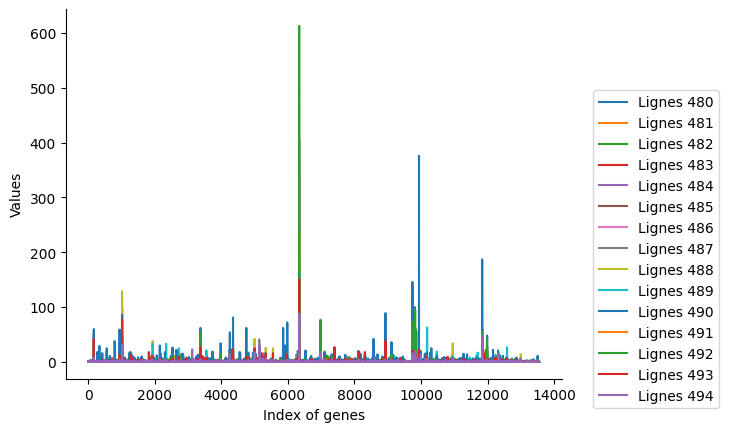

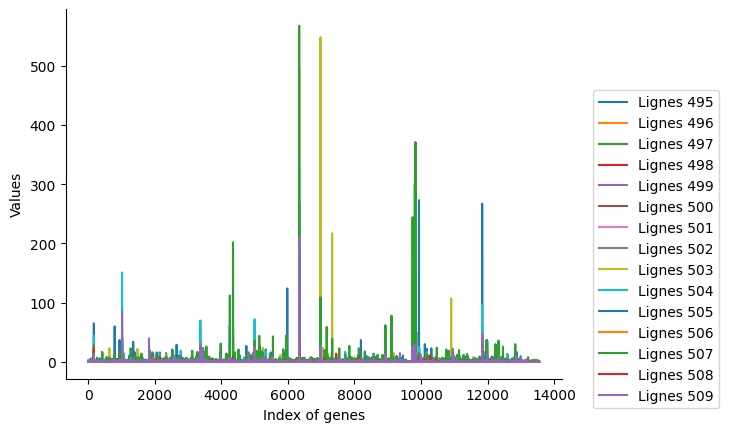

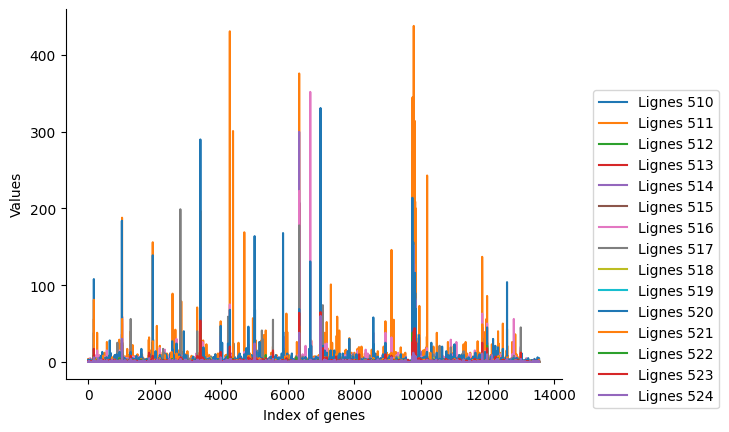

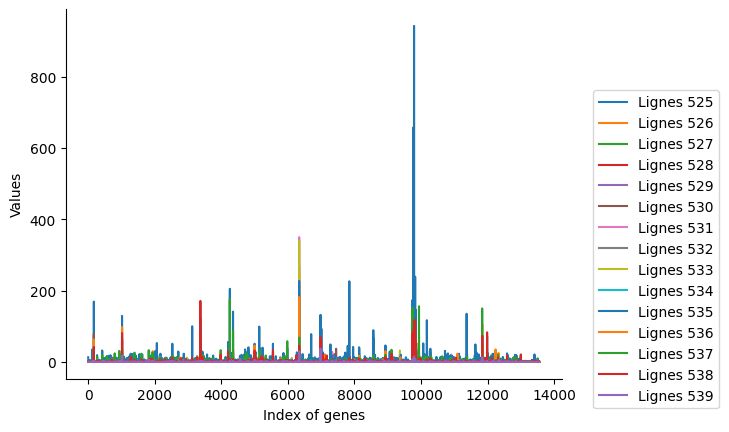

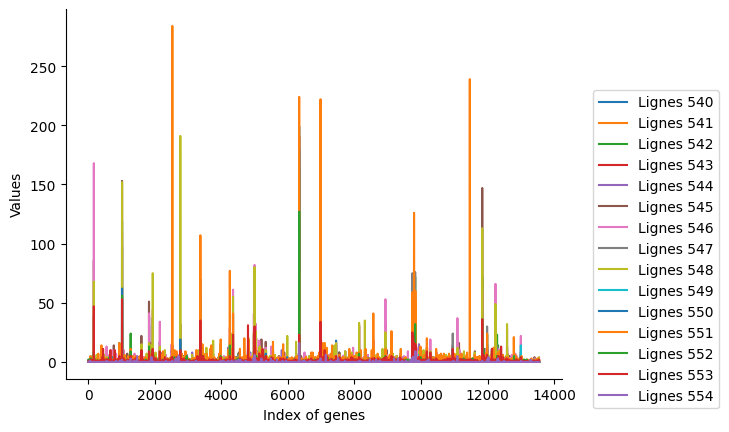

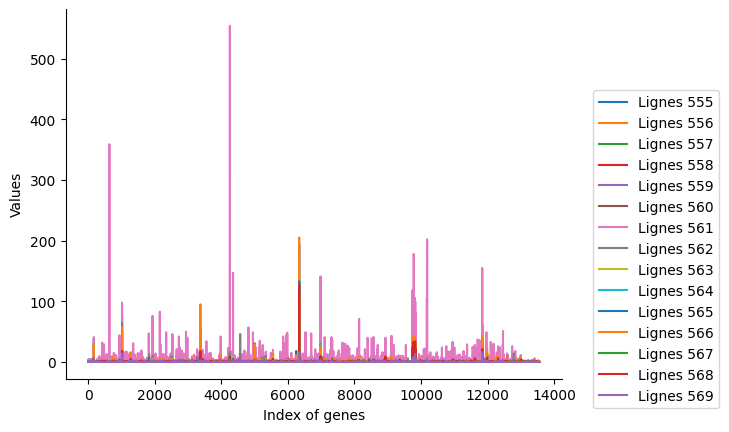

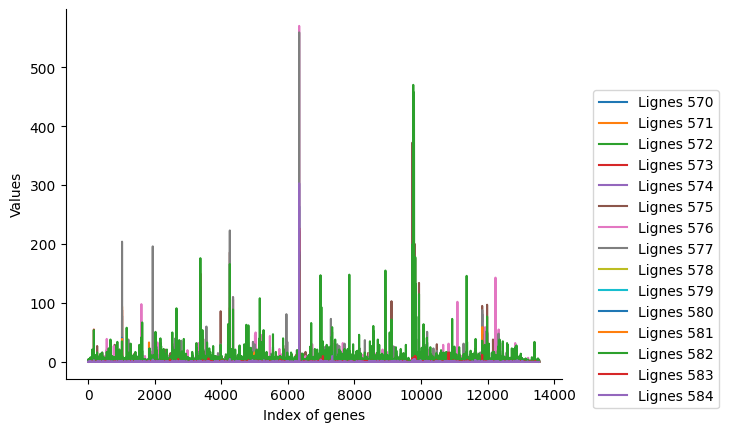

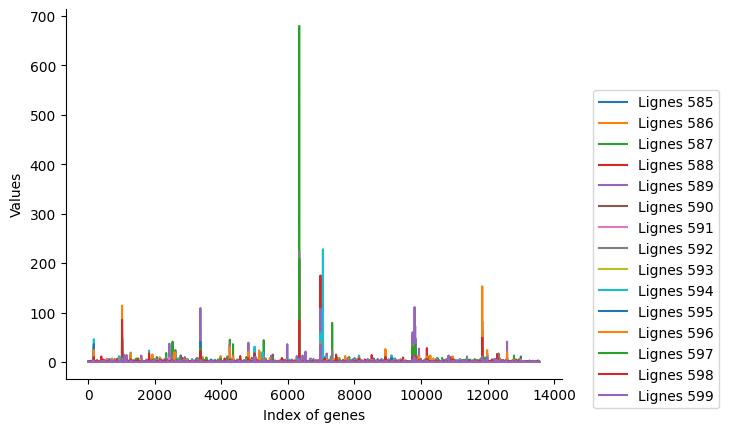

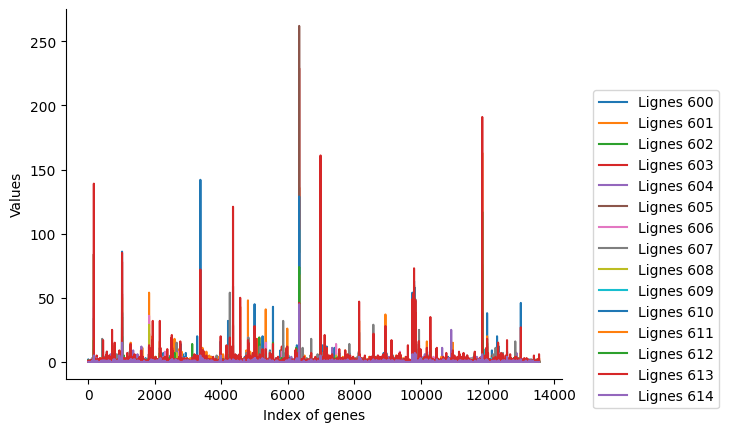

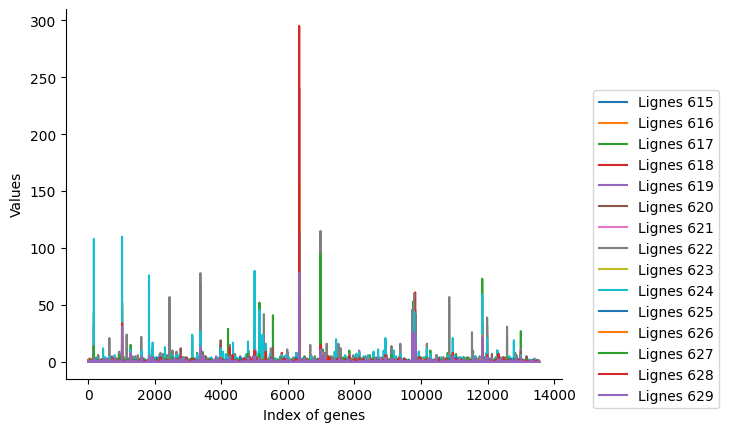

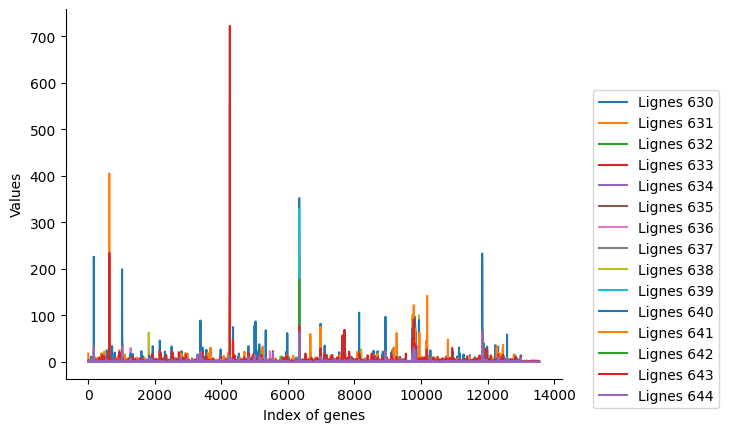

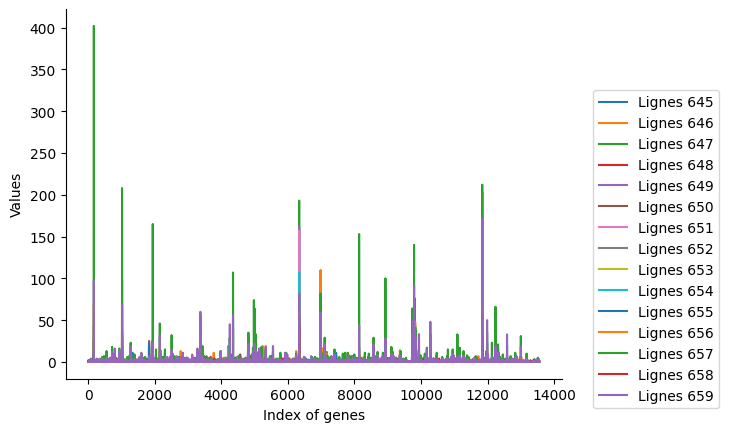

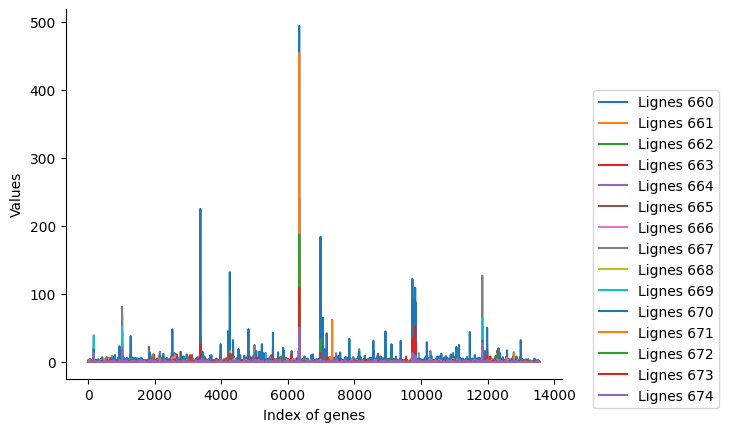

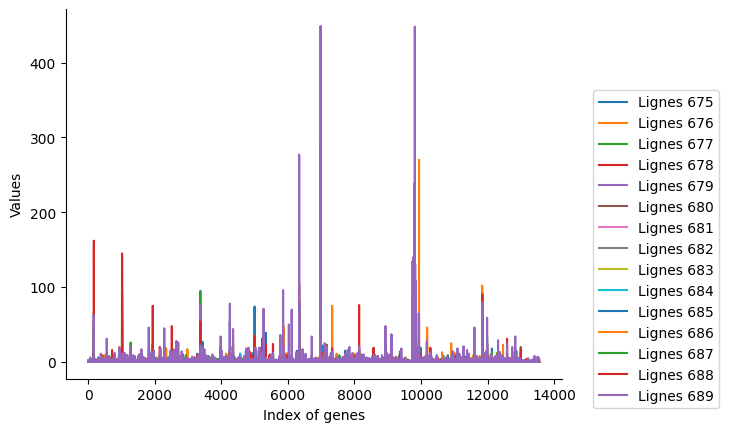

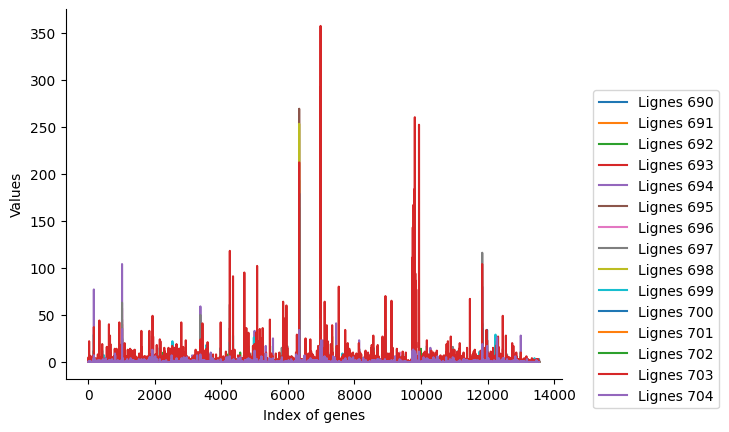

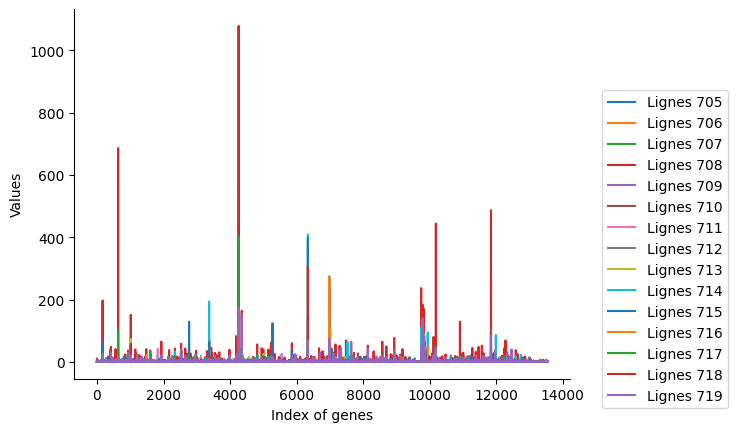

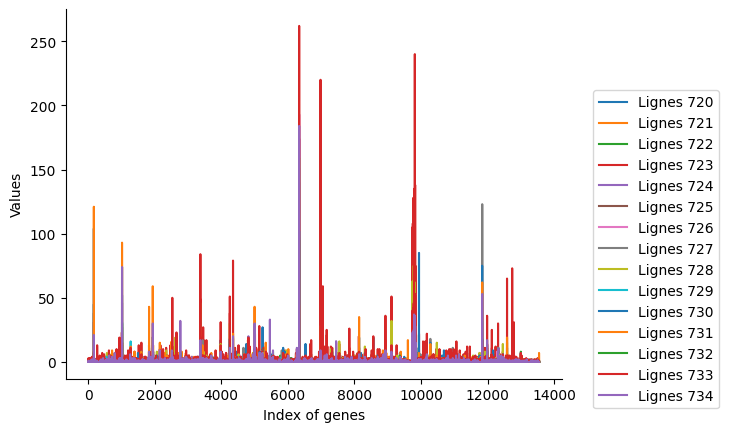

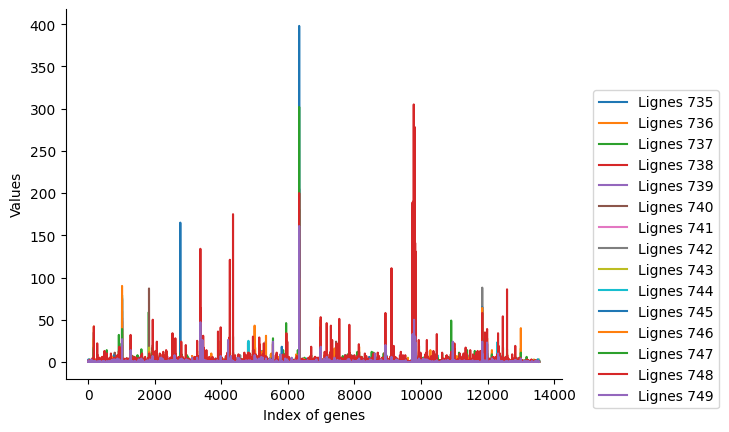

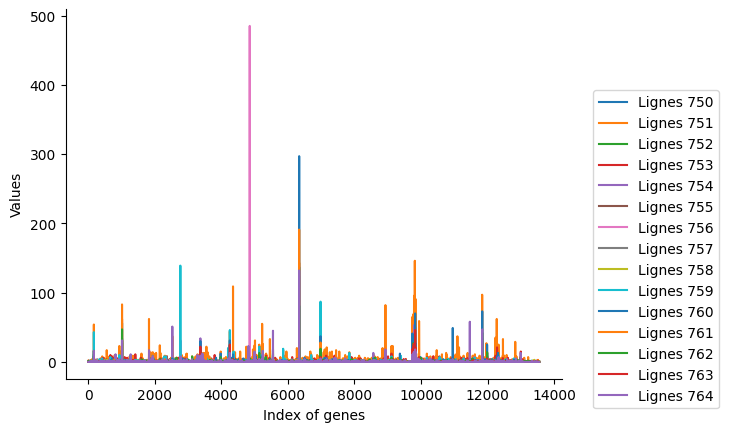

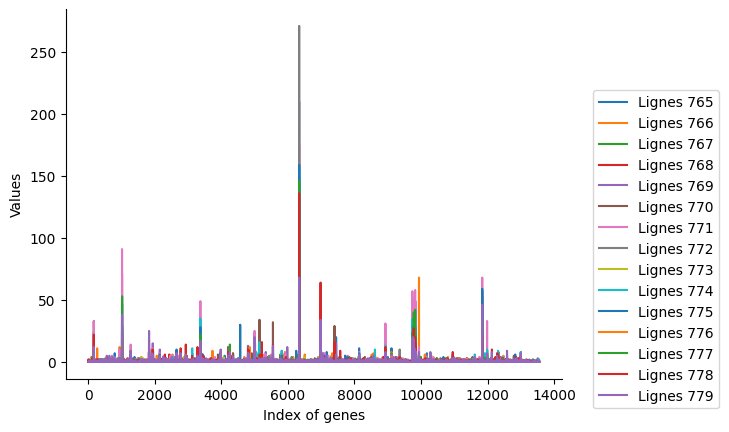

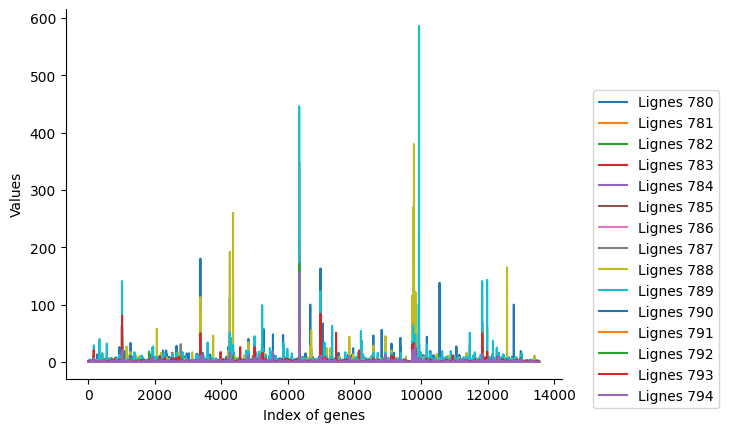

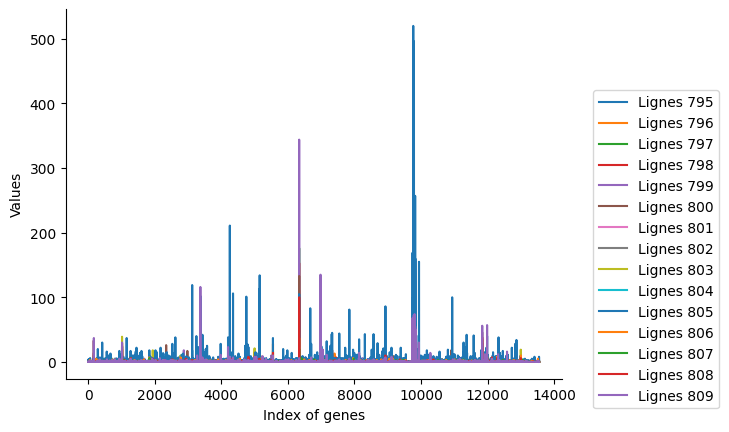

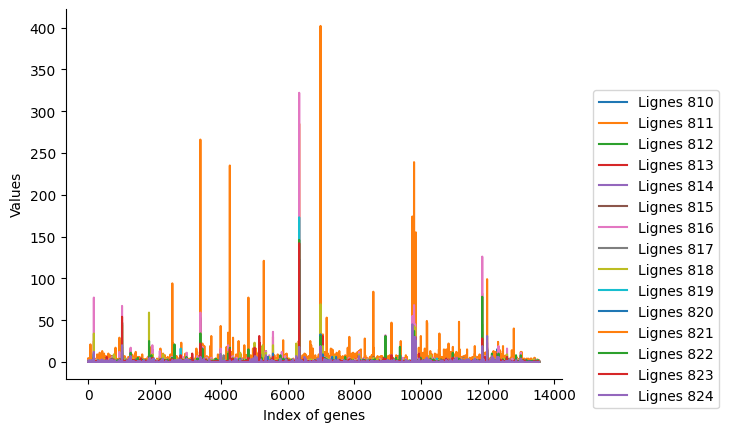

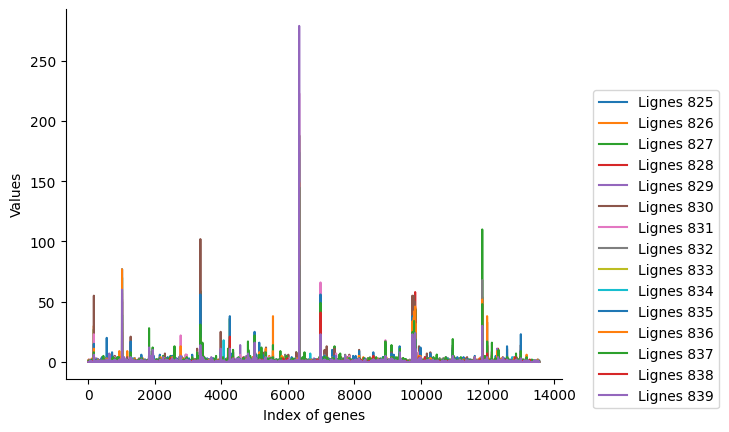

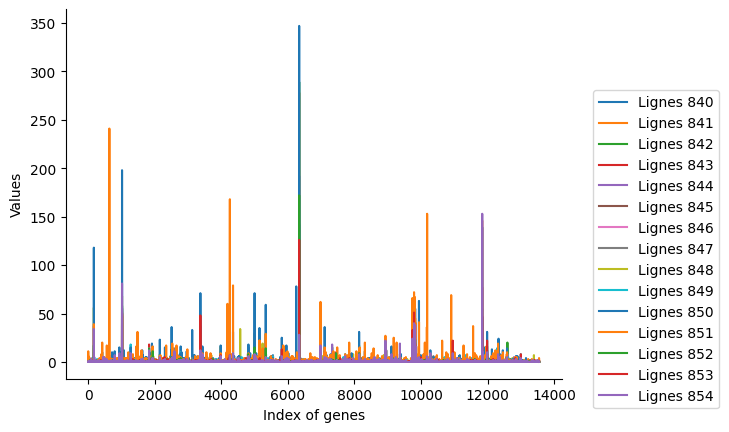

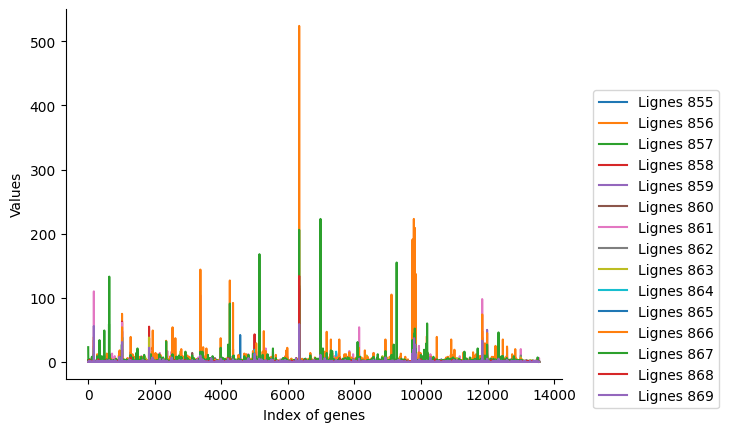

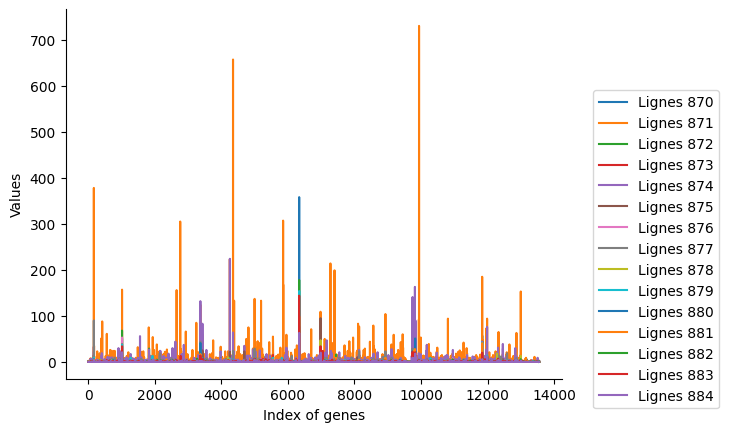

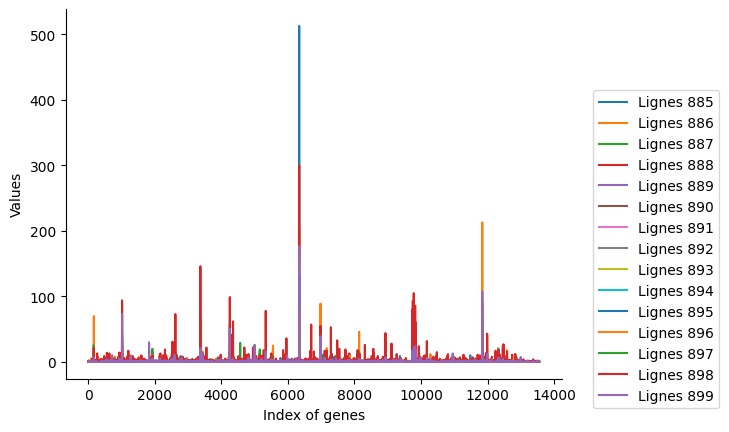

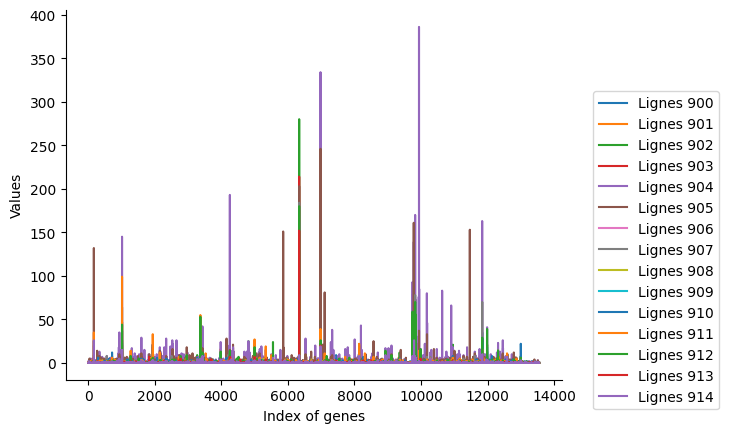

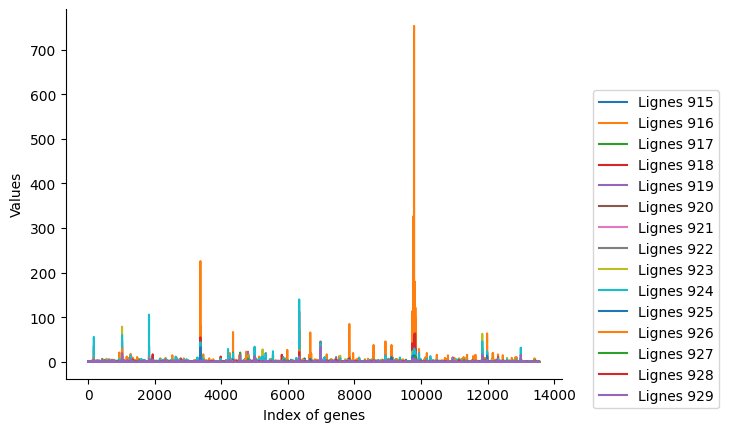

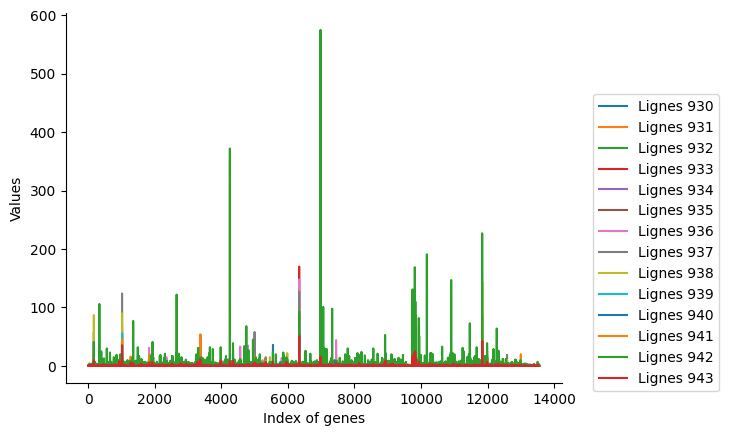

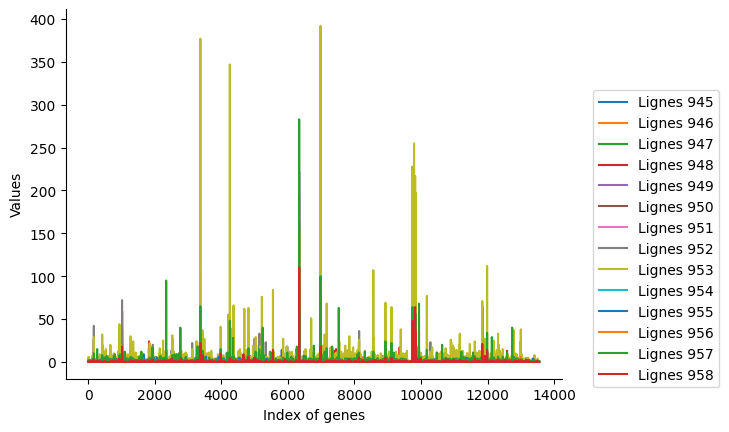

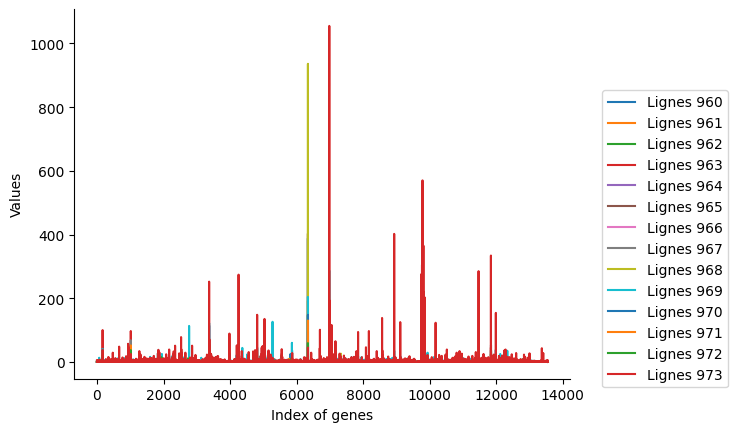

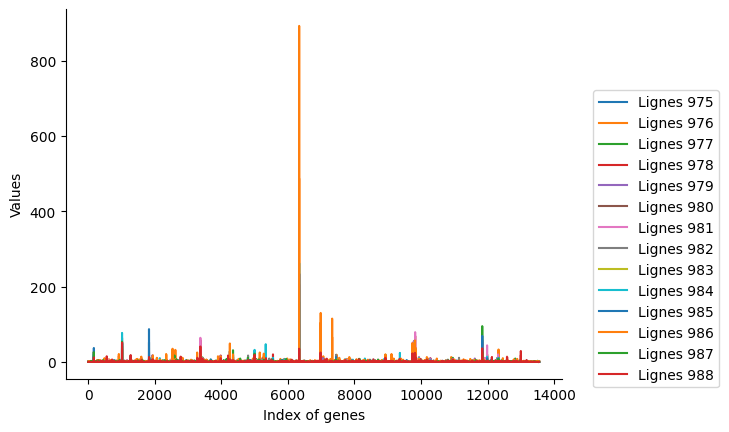

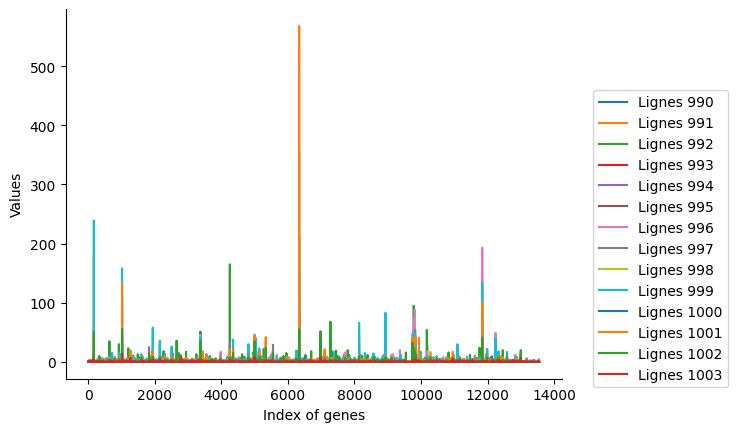

In [5]:
%%time
from utils import plot_cell

plot_cell(X_train.toarray(), 15)

**Most of the time, we notice no pattern in gene expressions (so we should definitely remove some cells and also some genes).**  
**Let's focus on each genes now :**

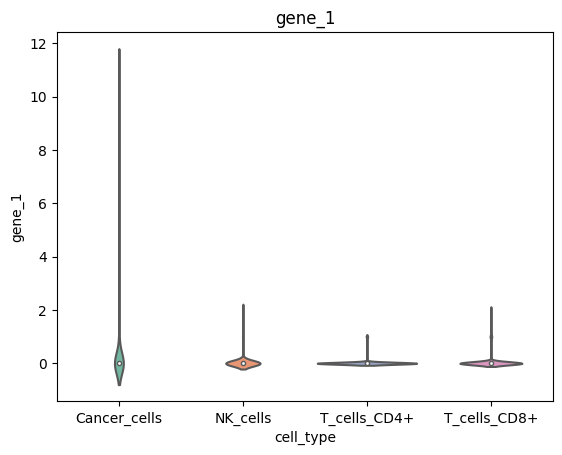

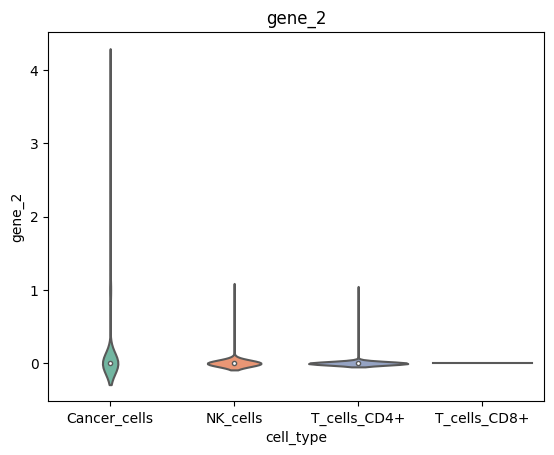

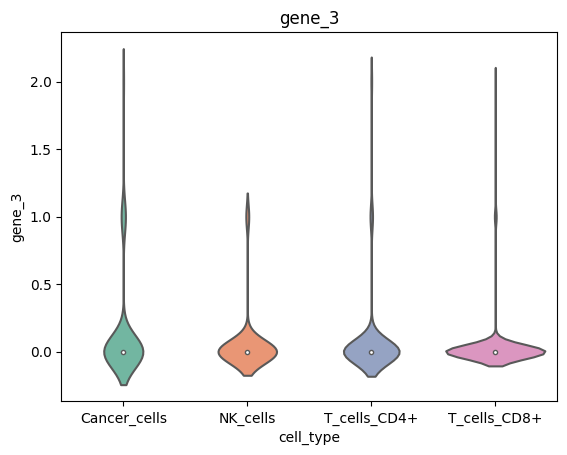

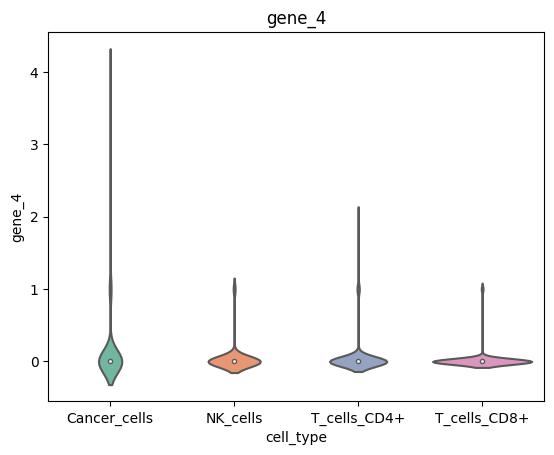

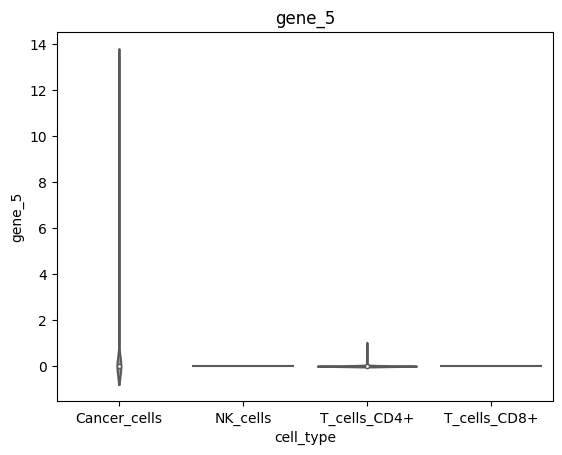

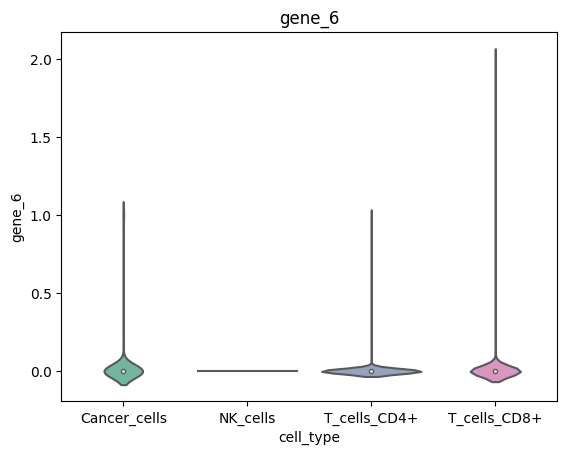

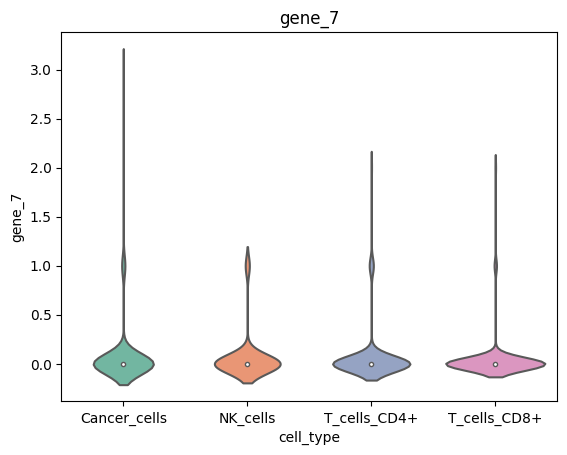

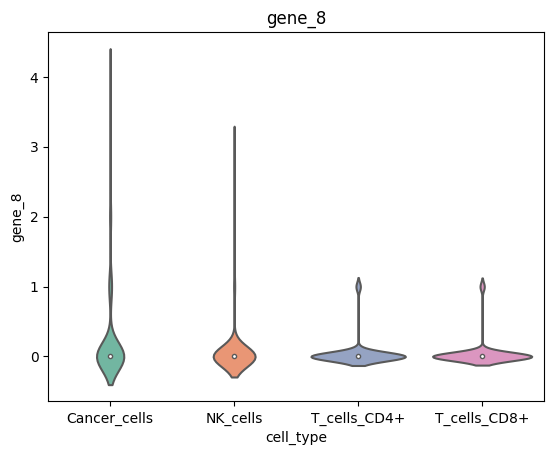

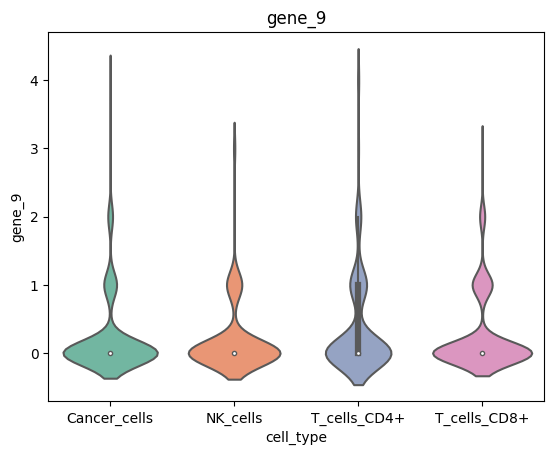

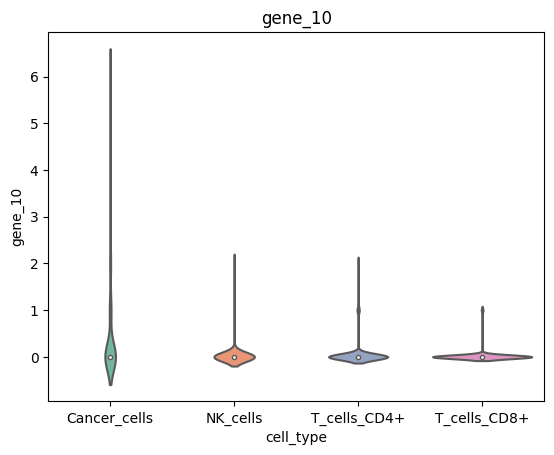

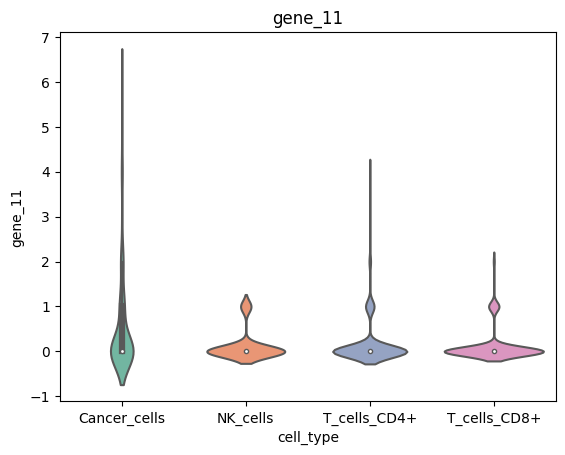

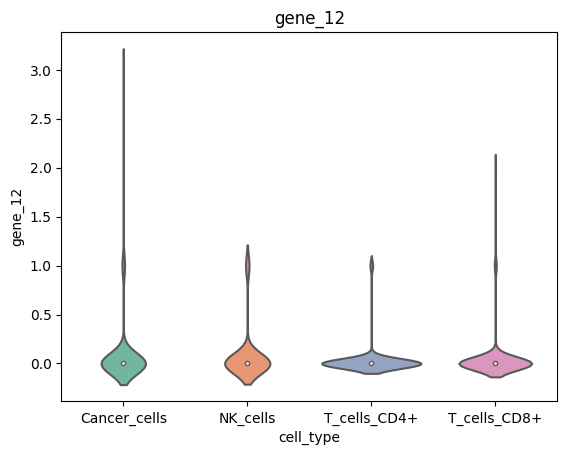

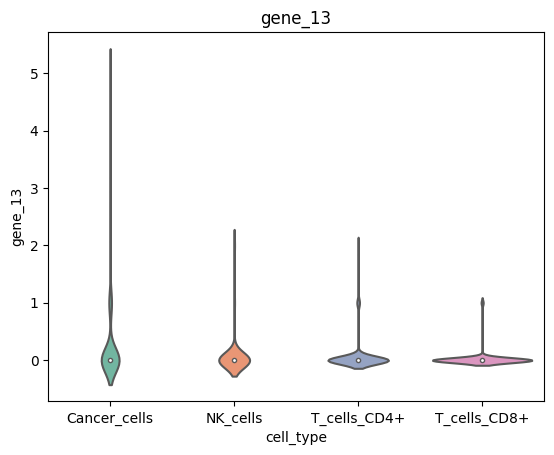

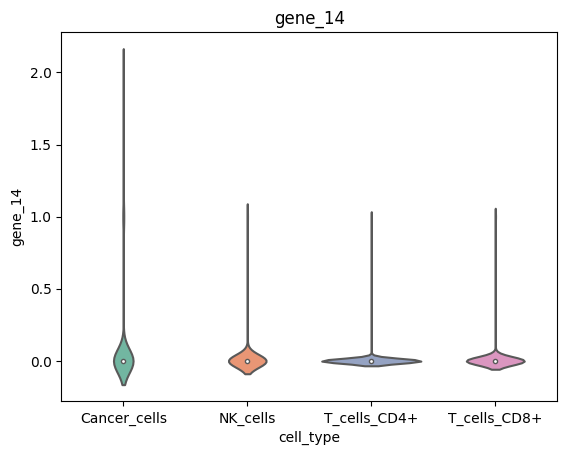

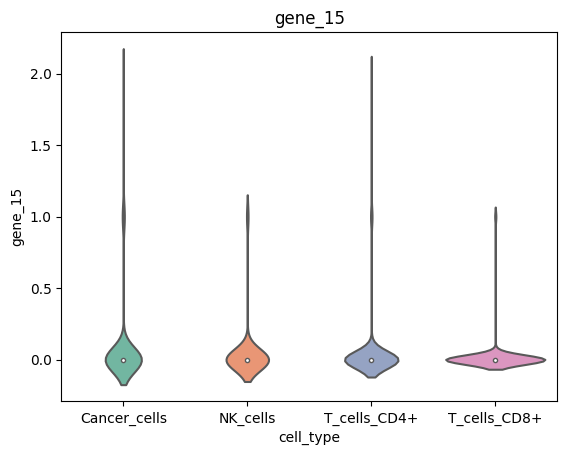

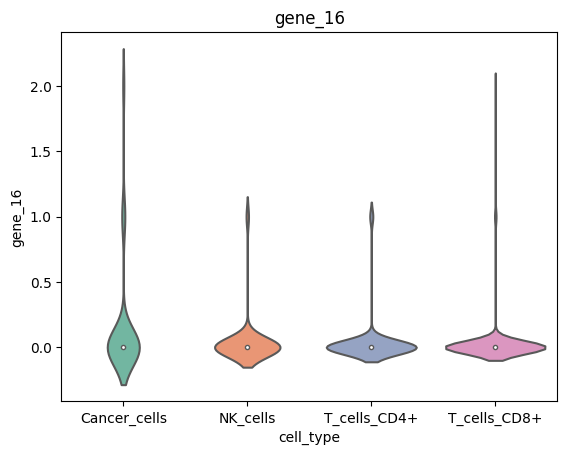

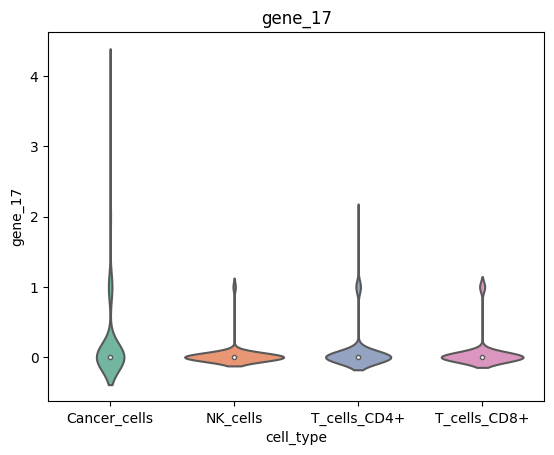

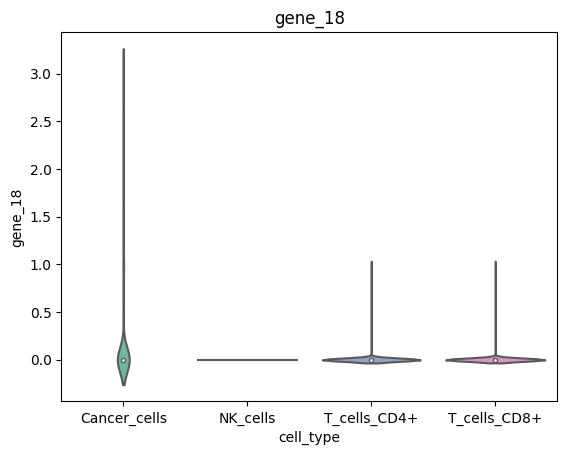

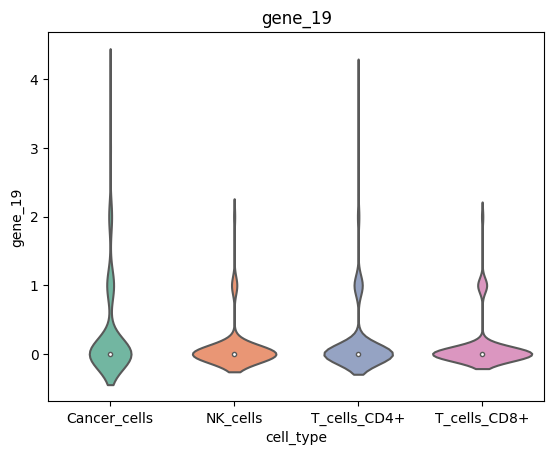

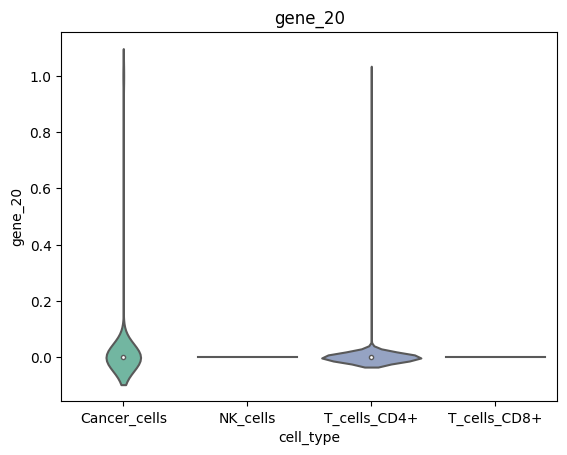

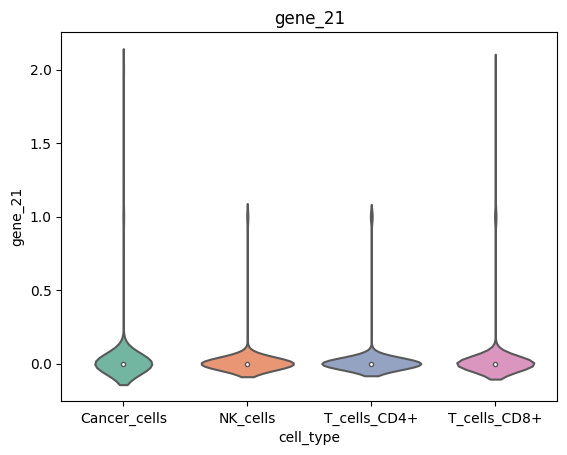

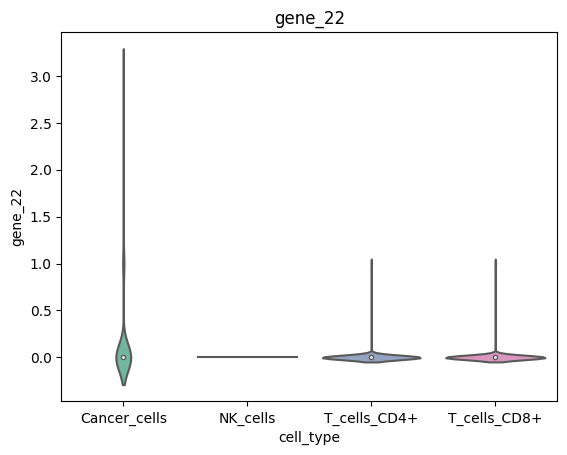

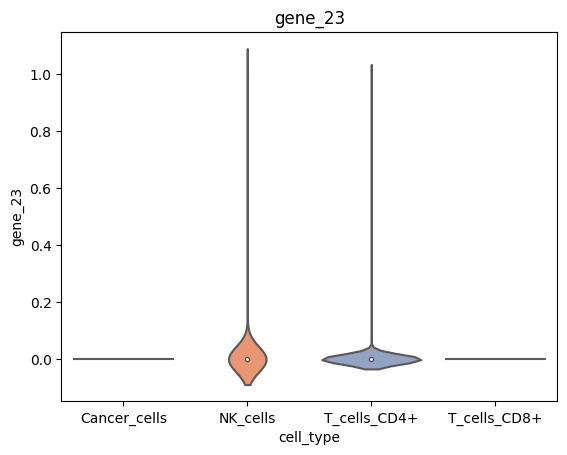

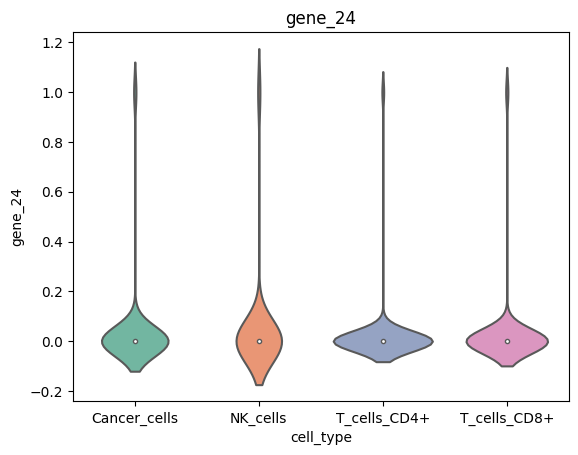

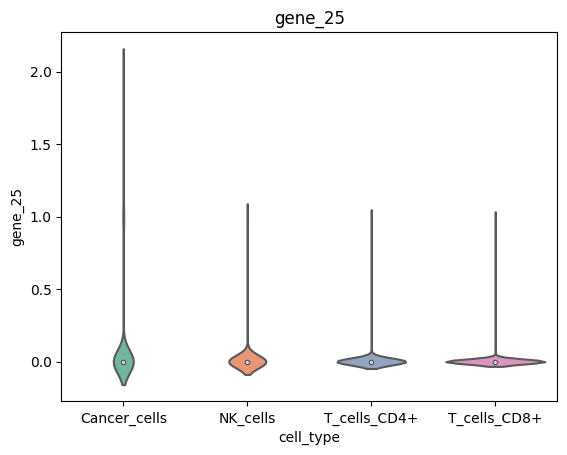

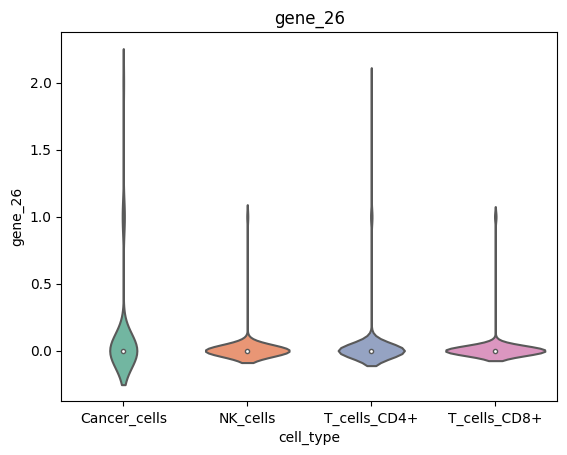

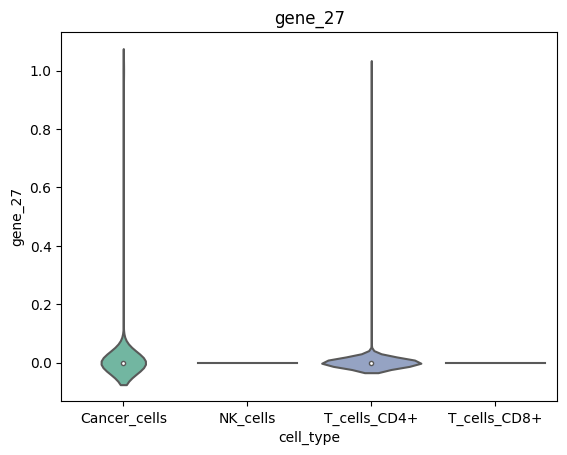

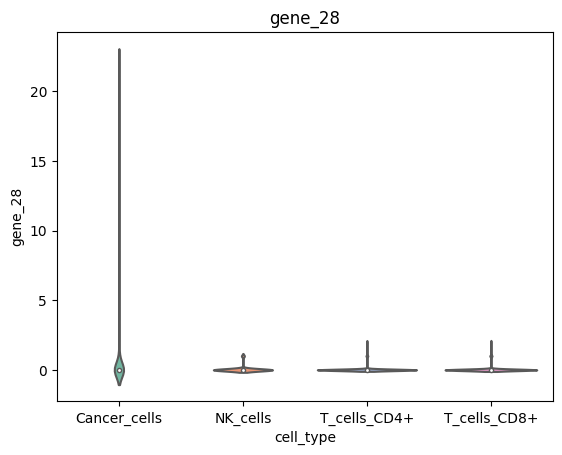

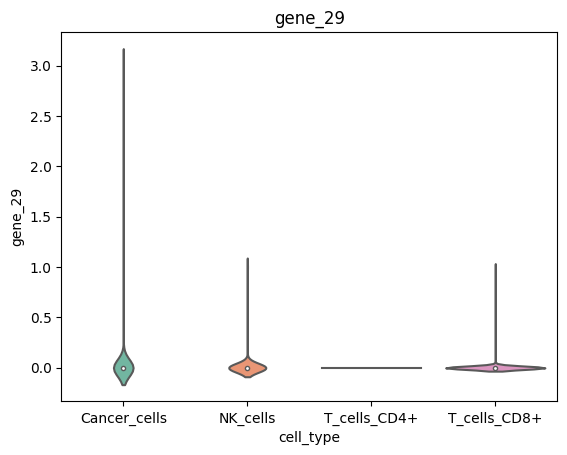

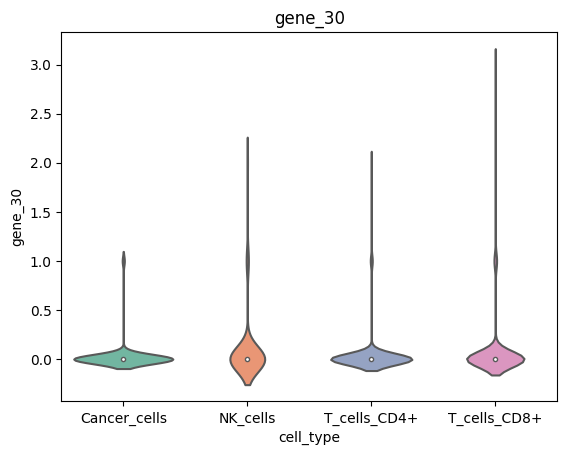

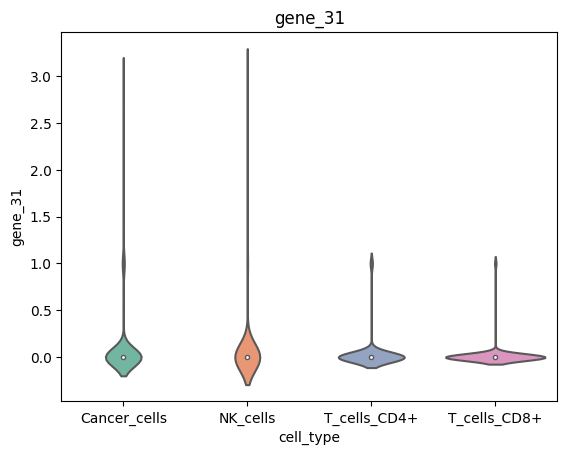

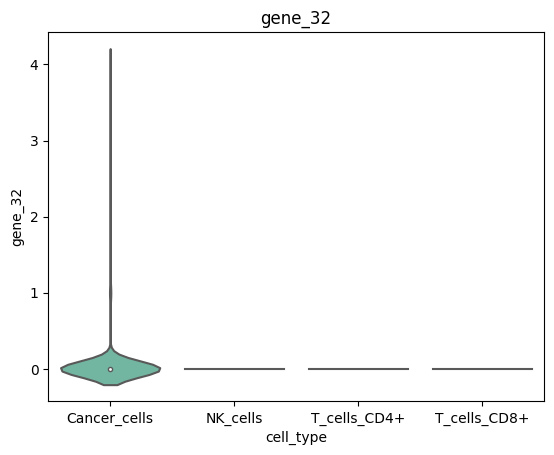

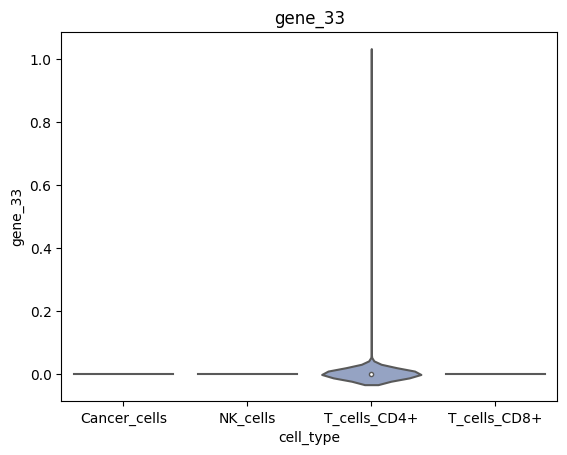

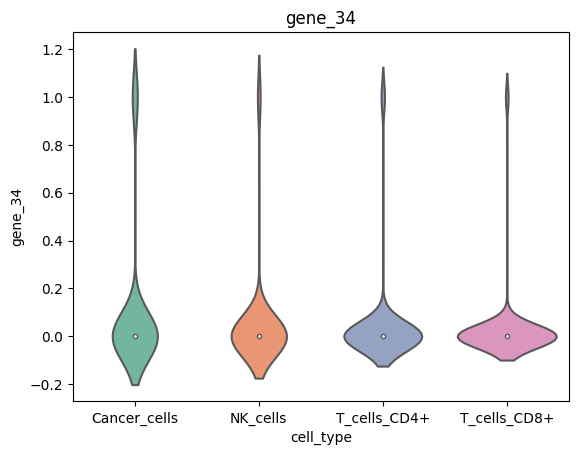

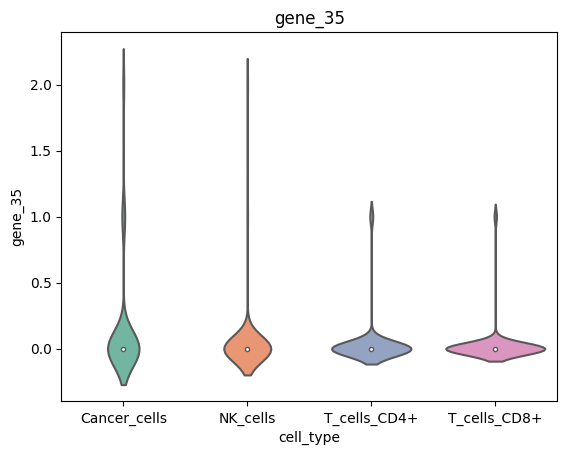

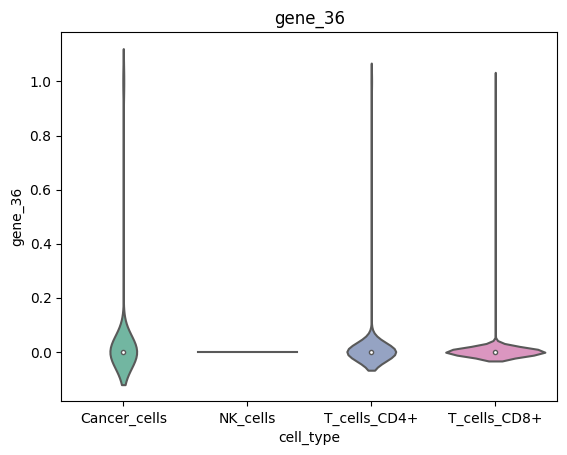

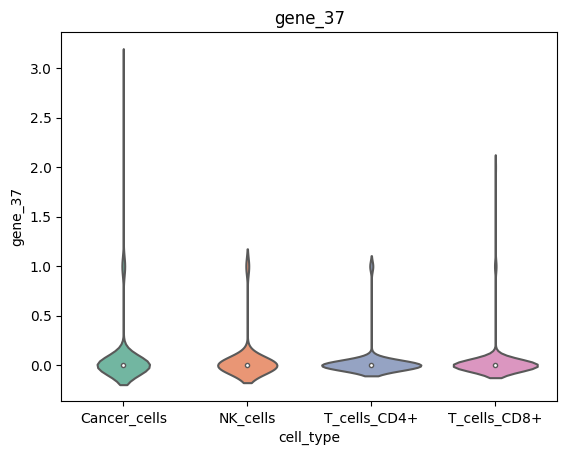

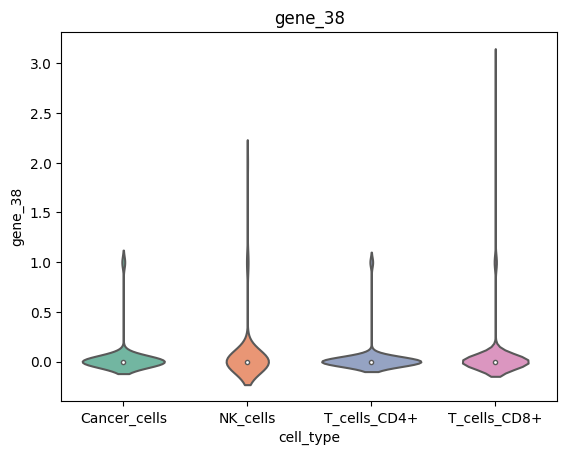

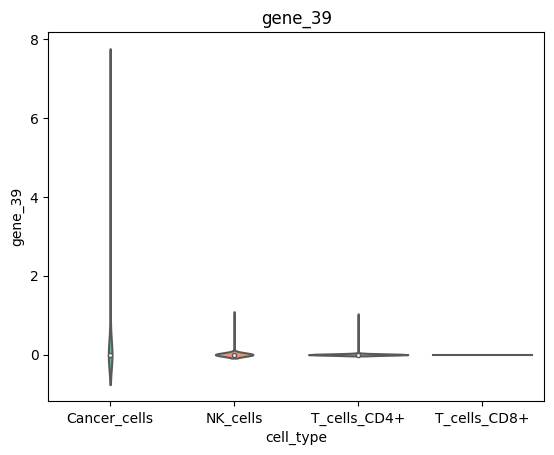

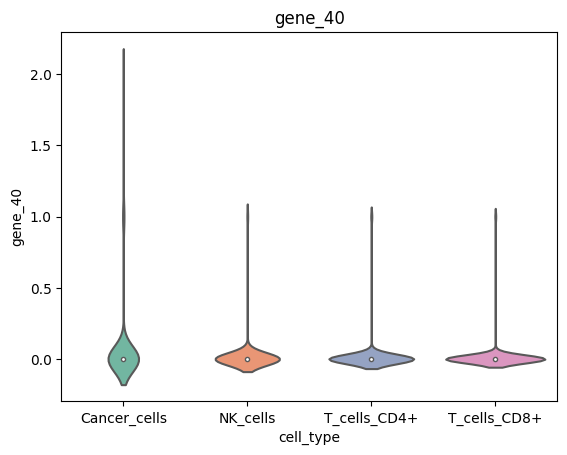

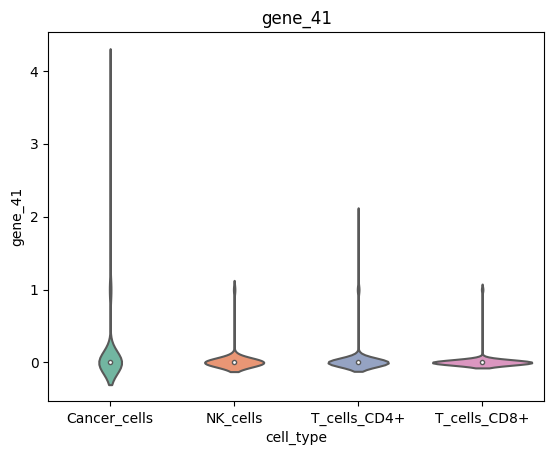

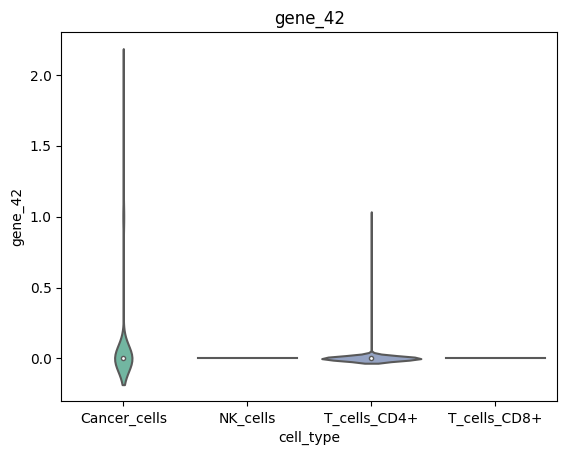

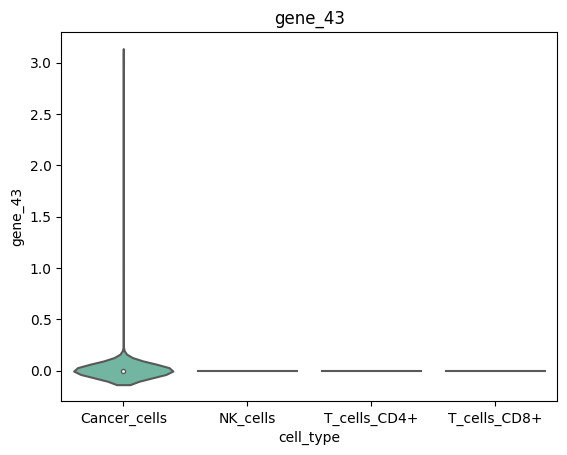

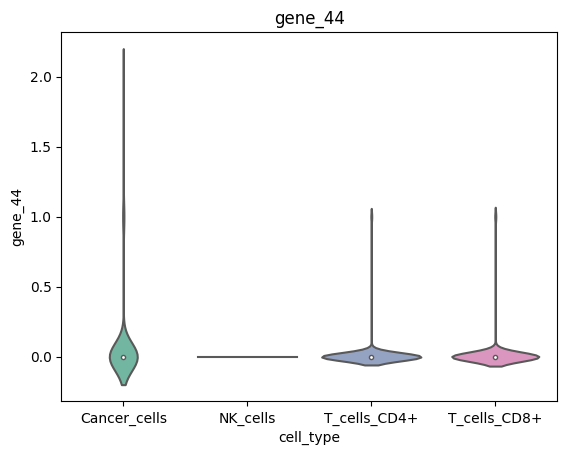

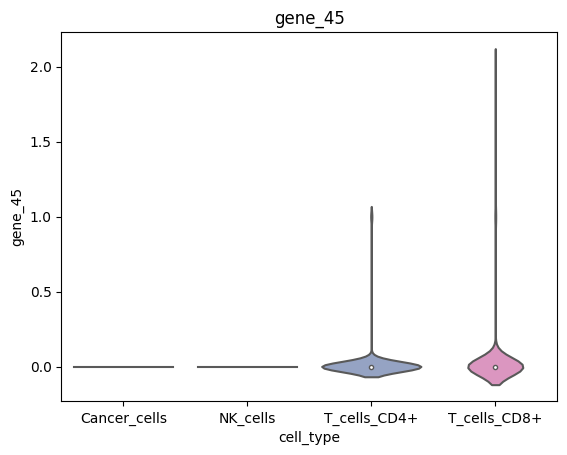

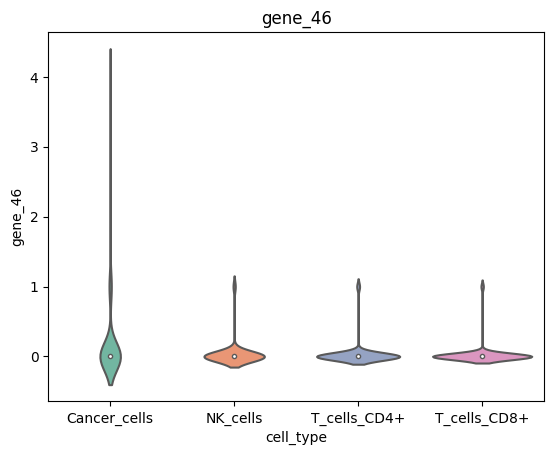

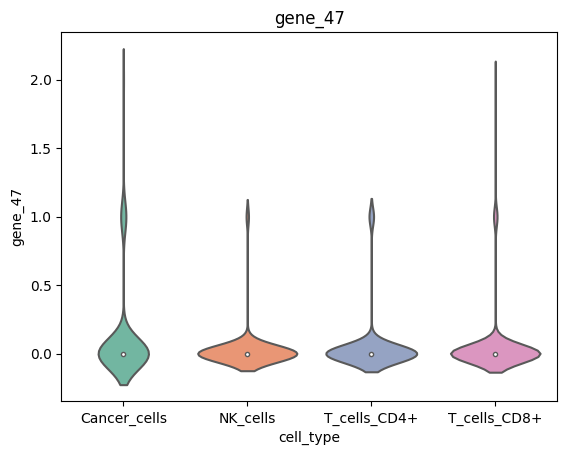

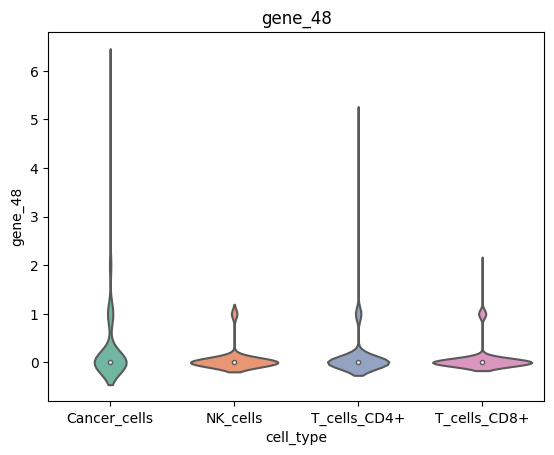

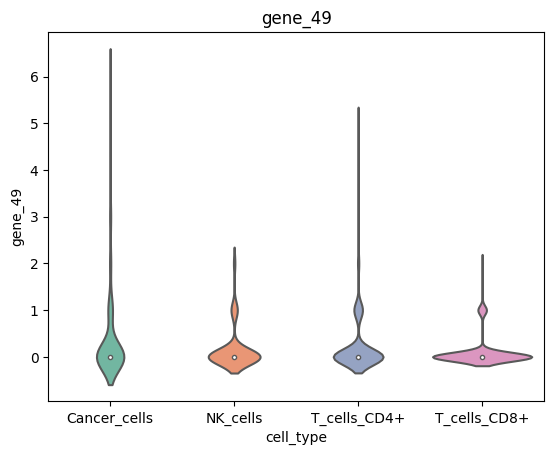

CPU times: total: 2.62 s
Wall time: 4.64 s


In [16]:
%%time
from utils import plot_gene

plot_gene(X_train[:, 1:50].toarray(), y_train)

**Some genes might be not as relevant as we might think to classify cells (Indeed, they are fewly expressed or they are always expressed).**

# Quality control

**First, we will remove cells and genes with a low call-rate (in red, an example of threshold) :**

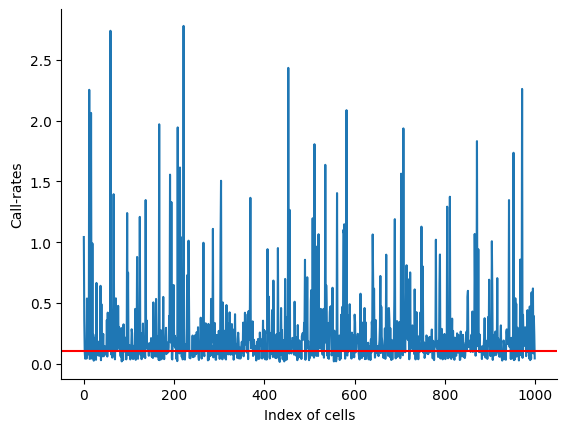

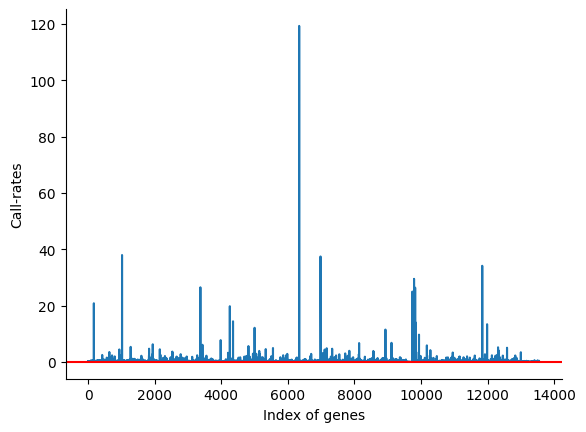

CPU times: total: 109 ms
Wall time: 169 ms


In [5]:
%%time

from utils import plot_cr_cell, plot_cr_gene

plot_cr_cell(X_train.toarray())
plot_cr_gene(X_train.toarray())

**Then we remove genes with a low variance (meaning they are always expressing, so they don't give us any information about cell-type) :**

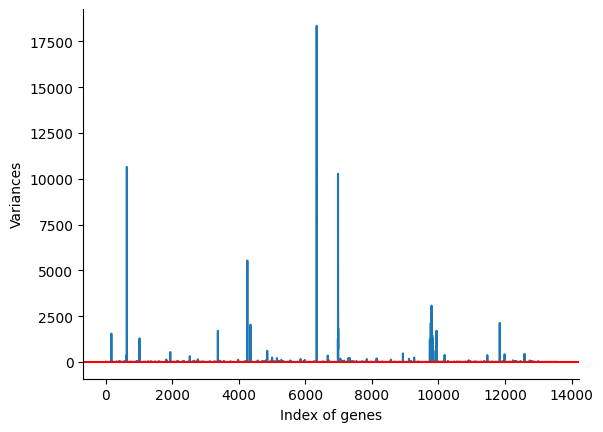

In [6]:
from utils import plot_var_gene

plot_var_gene(X_train.toarray())